In [1]:
import sys
import path
import pandas as pd
from fancyimpute import IterativeImputer
from fancyimpute import KNN 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from numpy import genfromtxt
import missingno as msno
%matplotlib inline
import seaborn as sns
import seaborn

In [3]:
# load the bollywood dataset
data = pd.read_csv(r'Heart Disease.csv')
# Inspect the first 5 rows
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Dropping education column which is irrelevent for the processing

In [4]:
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [5]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [63]:
def found_missing_series(fileHandler):
    try:
        dic_out = {}
        fileHandler.isna().sum()
        result=fileHandler.isna().sum()
        resultToDict=result.to_dict()
        for x, y in resultToDict.items():
            if y != 0:
                dic_out[x] = y
        result_series = pd.Series(dic_out) 
        return result_series
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [64]:
missing_values=found_missing_series(data)
print(missing_values)

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [65]:
def impute_data_mice(filePd,column_names):
    try:
        mice_imputer = IterativeImputer()
        arr = mice_imputer.fit_transform(filePd) 
        filePd = pd.DataFrame(arr, columns =column_names)
        return filePd
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [6]:
numerical_col=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
Category_col=['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

### Missing Values Visualization

####  By using msno matrix

  The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

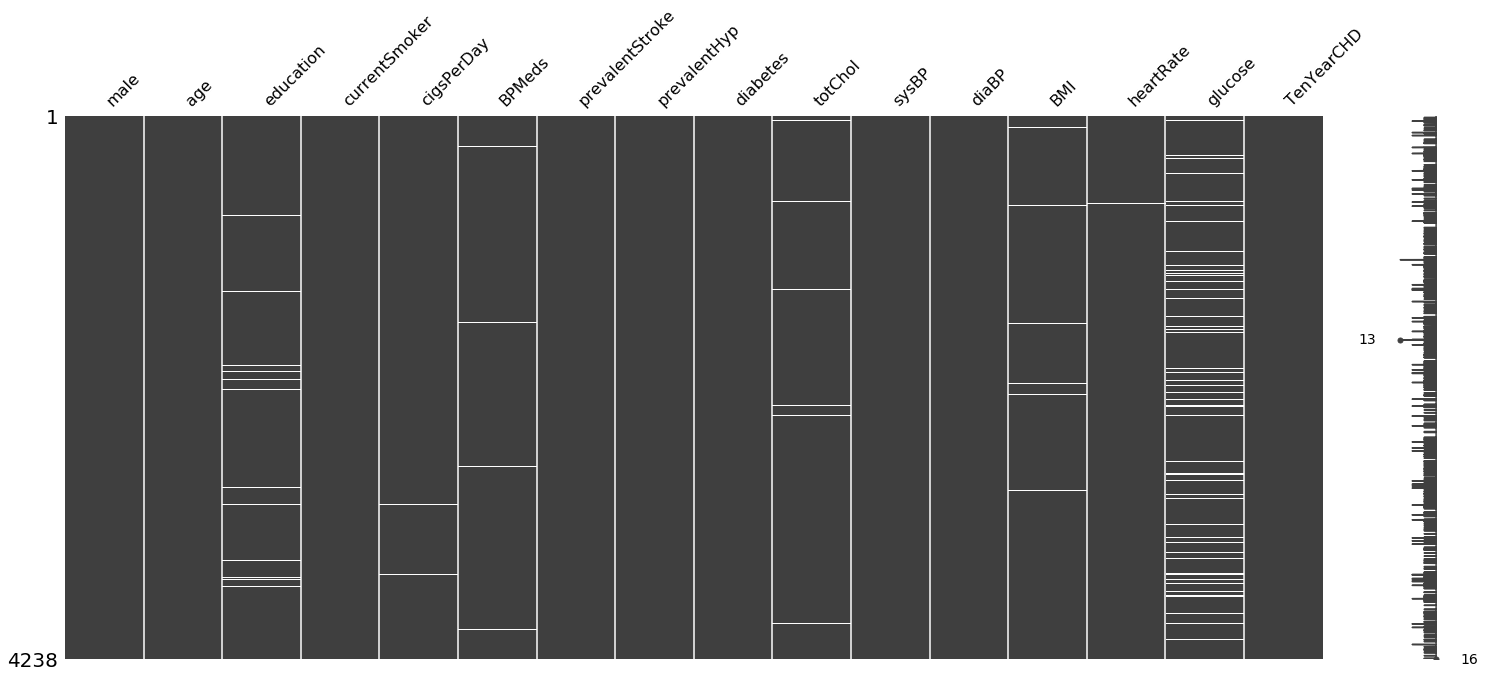

In [7]:
msno.matrix(data)

#### By using msno bar 
The msno.bar is a simple visualization of nullity by column

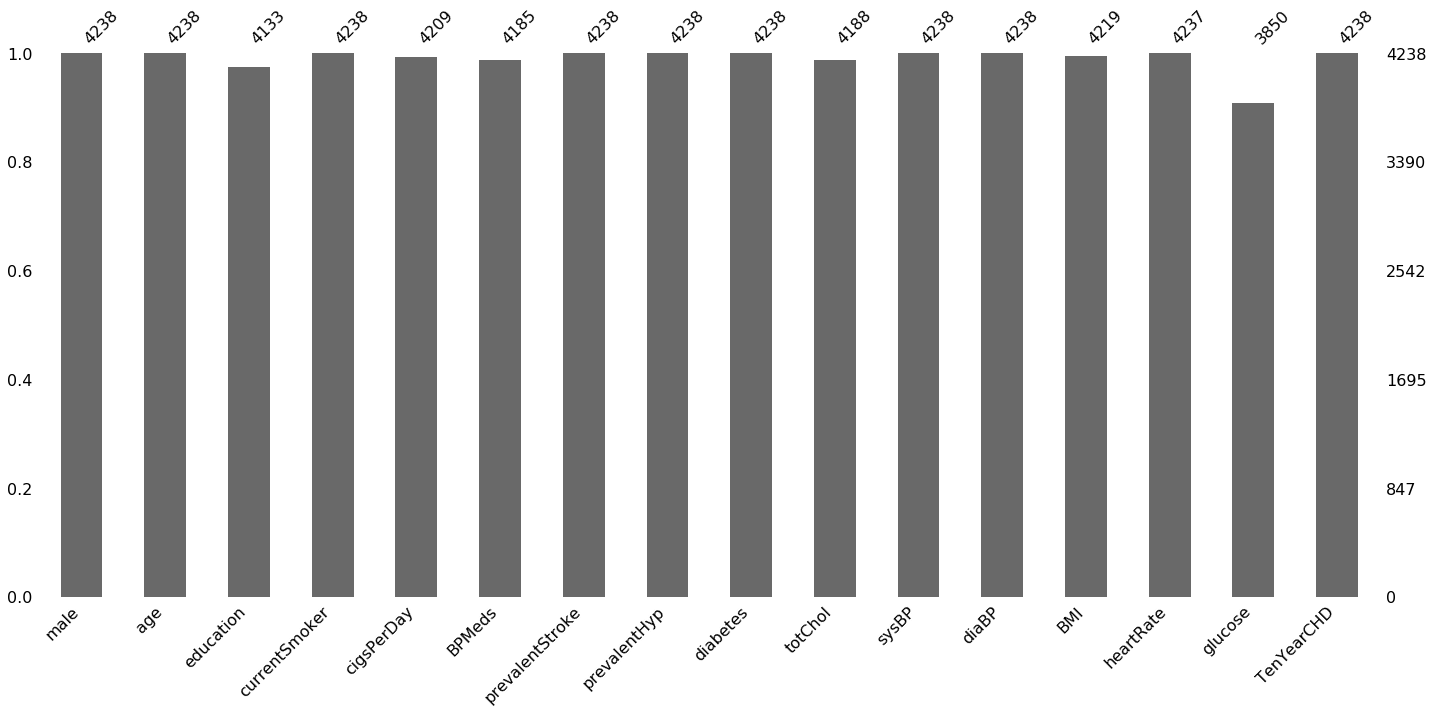

In [8]:
msno.bar(data)

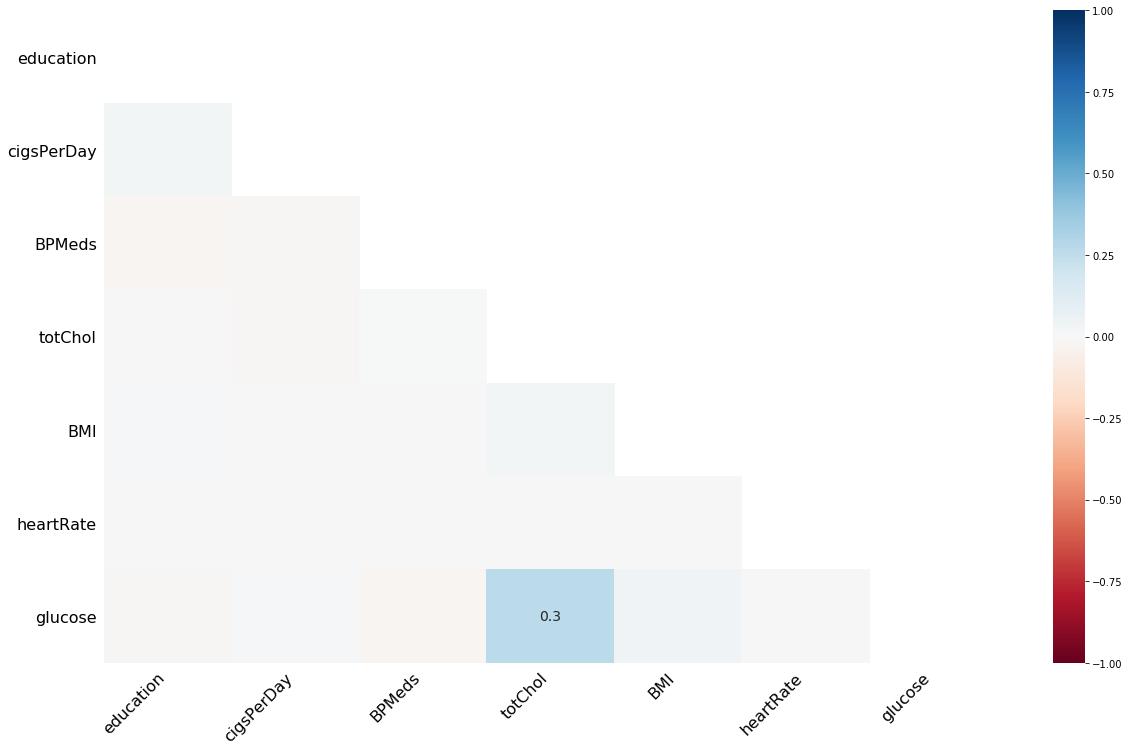

In [9]:
msno.heatmap(data)

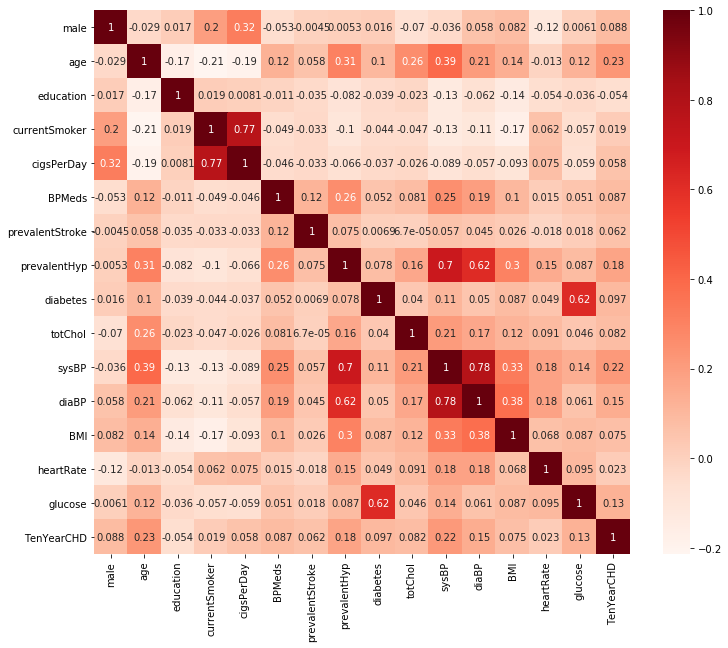

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Target variable Visualization 

In [11]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


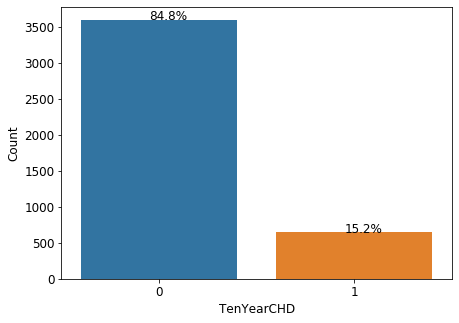

In [12]:
plt.figure(figsize = (7,5))
ax = sns.countplot("TenYearCHD", data = data)
plt.xticks(size = 12)
plt.xlabel("TenYearCHD", size =12)
plt.yticks(size = 12)
plt.ylabel("Count", size =12)

without_hue(ax,data.TenYearCHD)

In [13]:
numerical = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
category = ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [14]:
def percentageDistribution(data, percentCol, target):
        try:
            # cat col vs target
            fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
            distribution = data[percentCol].value_counts()
            percentColValue = [int(x) for x in sorted(distribution.index)] 
            targetCount = dict(map(lambda x: [x,0],percentColValue))
            
            for t,c in zip(data[target],data[percentCol]):
                targetCount[c] += t
                rates = [(targetCount[c] / float(distribution.loc[c]))*100 for c in percentColValue]      
            x = np.arange(len(percentColValue))
            ax.bar(x,rates,color = 'Orange')
            ax.set_xticks(x)
            ax.set_xticklabels(percentColValue)
            ax.set_xlabel(percentCol)
            ax.set_ylabel('Percentage of People with CHD')
            
            plt.show()
        except Exception as exp:
              print("in the expect")
    

In [39]:
def count_plot(data,categoricalCols,response='TenYearCHD'):
    for i in categoricalCols:
                for j in [response]:
                    plt.figure(figsize=(15, 7))
                    plt.subplot(121)
                    graph = sns.countplot(y=data[i],
                                          palette="Set2",
                                          order=data[i].value_counts().index[:100])
                    plt.title("Distribution of " + i)

                    plt.subplot(122)
                    sns.countplot(y=data[i],
                                  hue=data[j], palette="Set2",
                                  order=data[i].value_counts().index[:100])
                    plt.ylabel("")
                    plt.title("Distribution of " + i + " by " + j)

                    plt.subplots_adjust(wspace=.4)


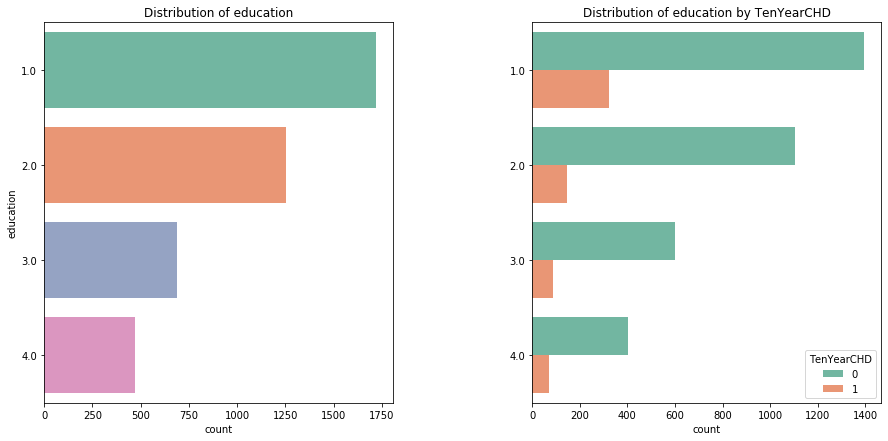

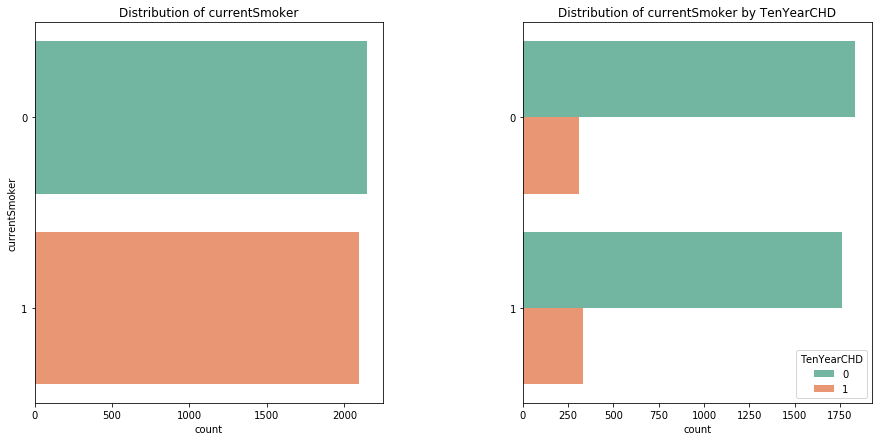

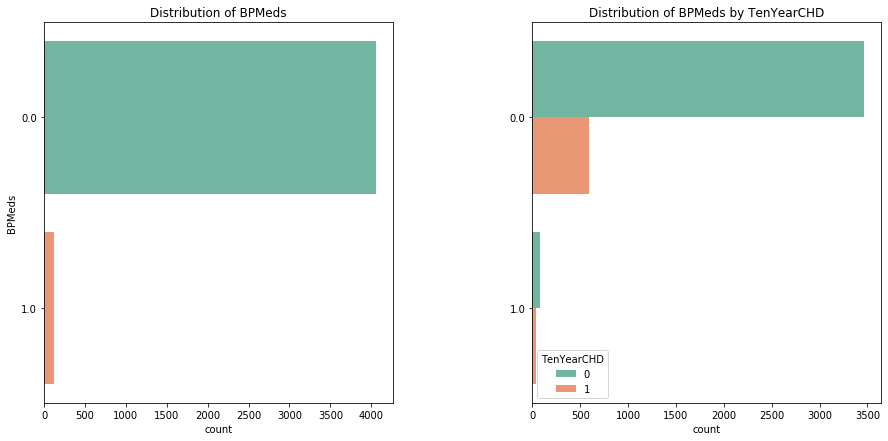

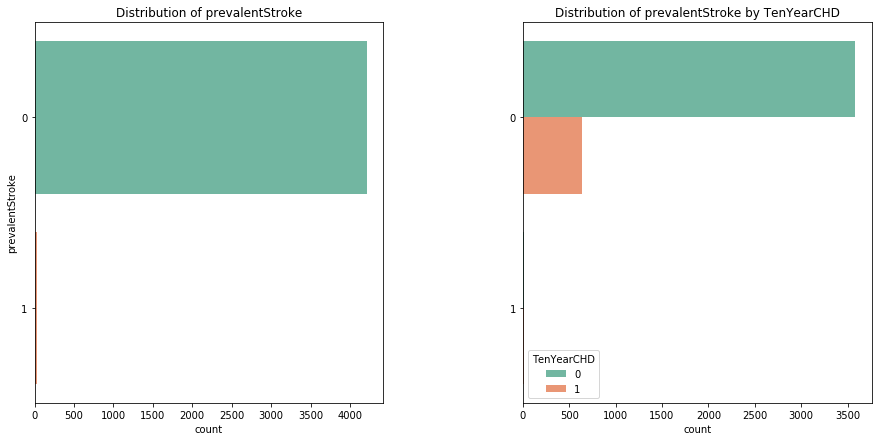

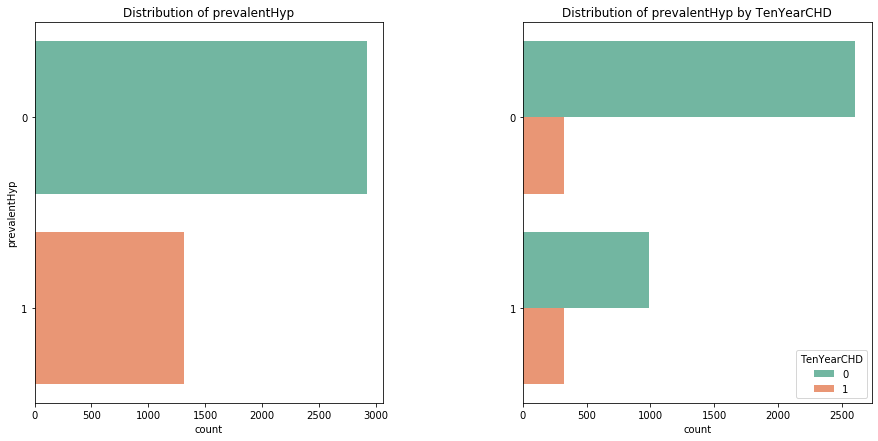

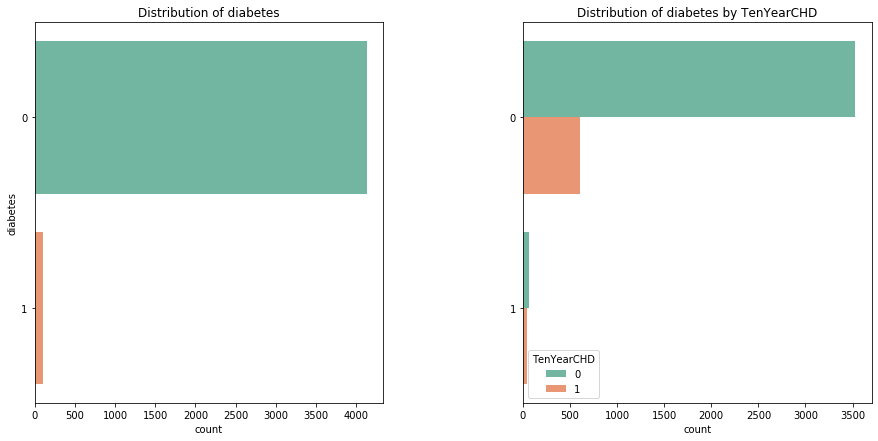

In [40]:
count_plot(data,category)

In [17]:
def scatter_plot(data,numericCols,response='TenYearCHD'):
    for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full",
                                    hue=data[response].tolist())
                    #ax.legend(title=response)  # add a title to the legend
                    plt.show()

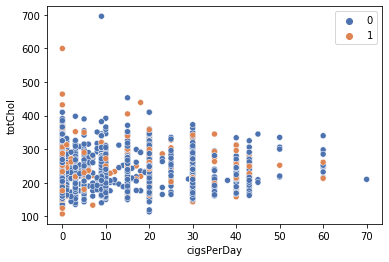

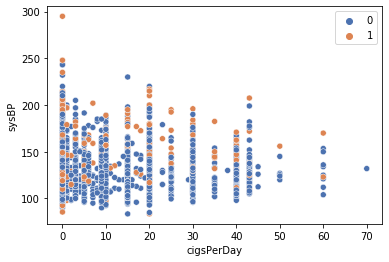

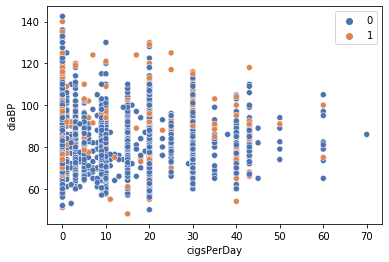

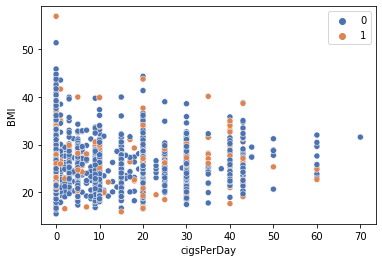

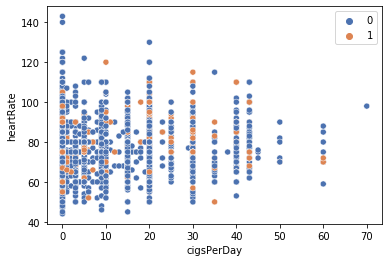

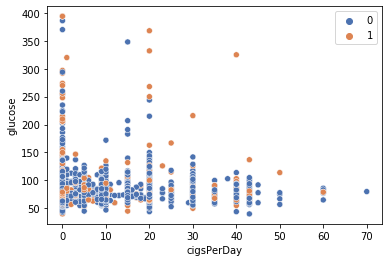

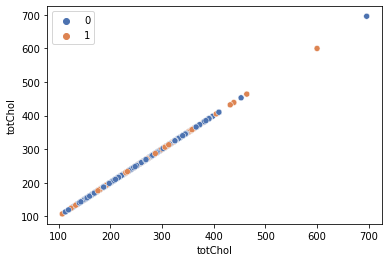

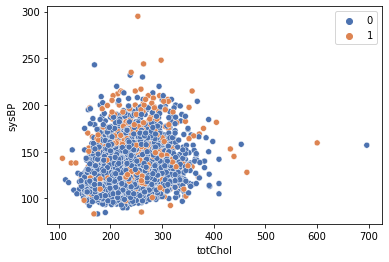

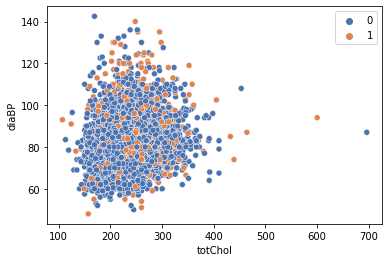

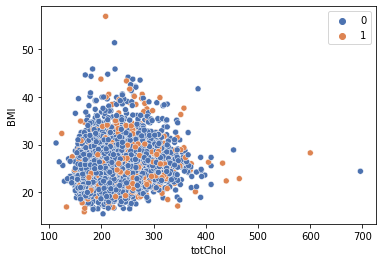

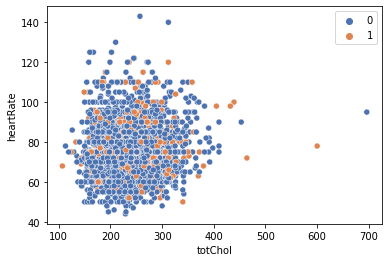

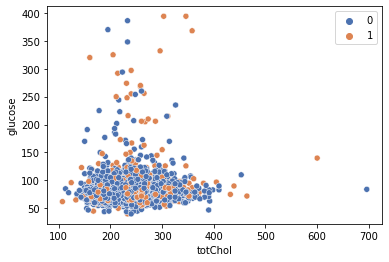

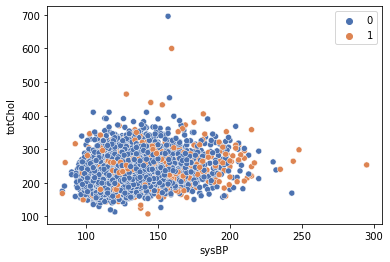

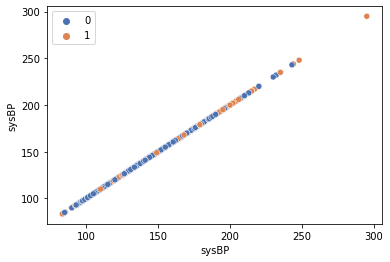

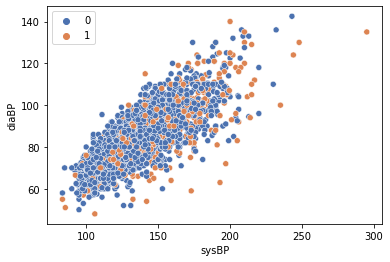

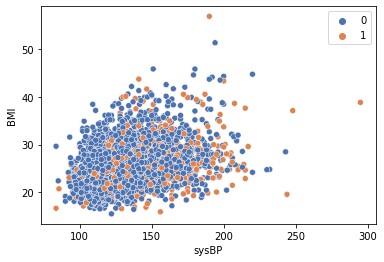

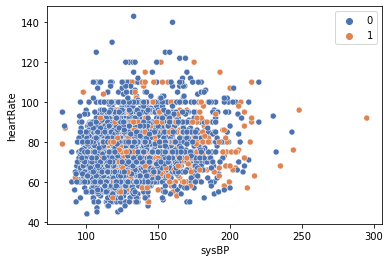

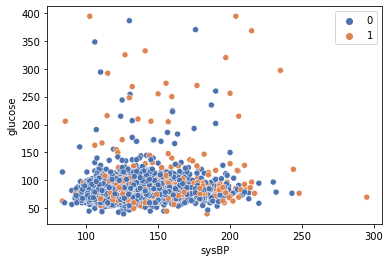

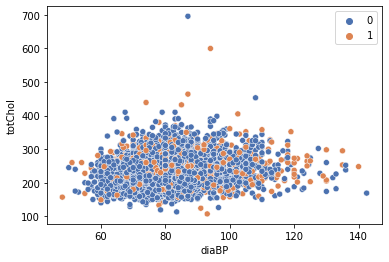

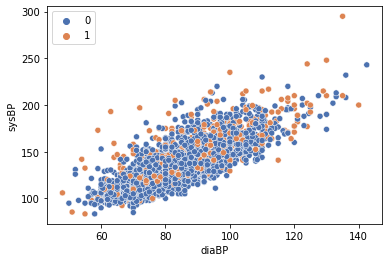

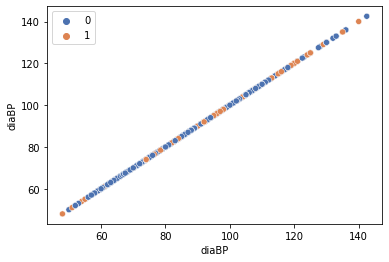

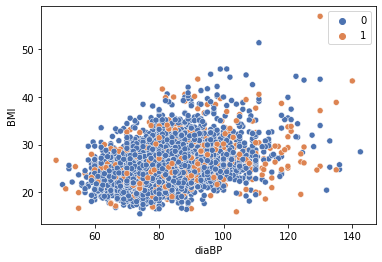

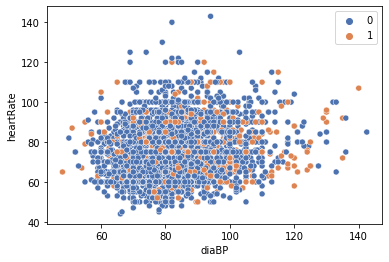

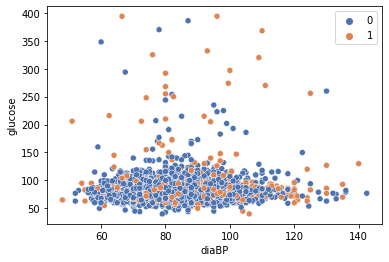

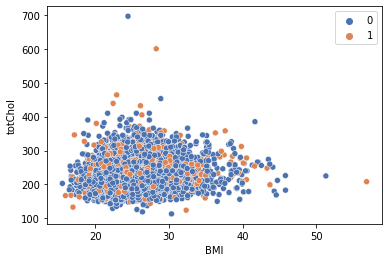

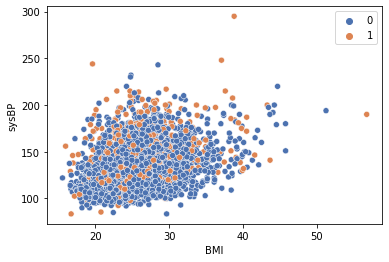

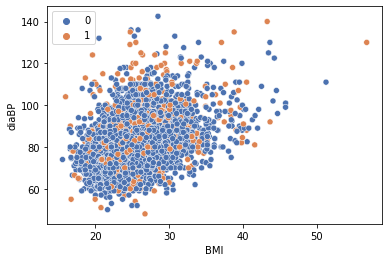

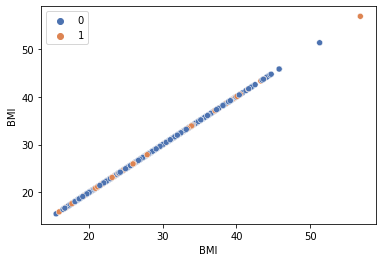

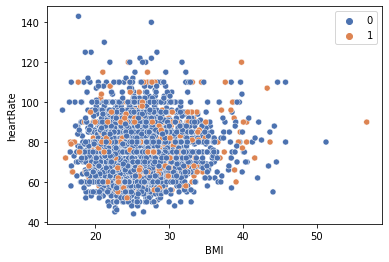

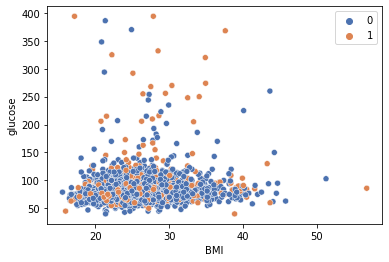

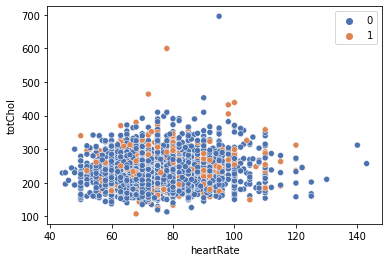

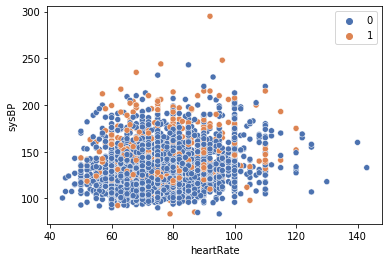

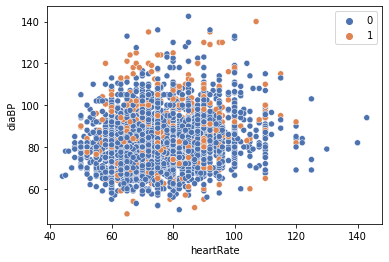

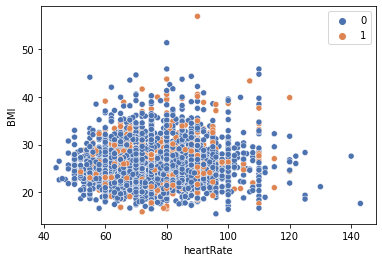

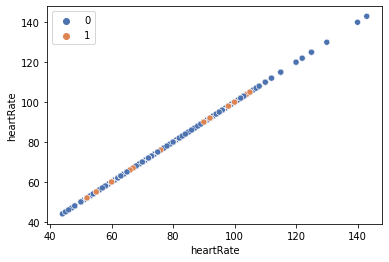

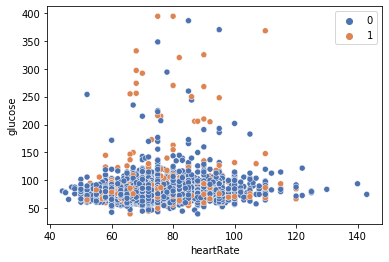

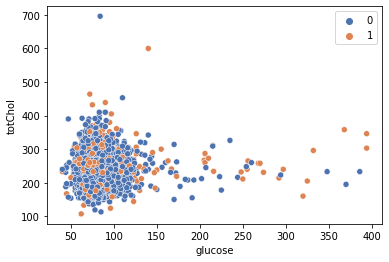

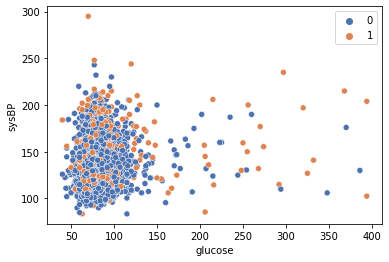

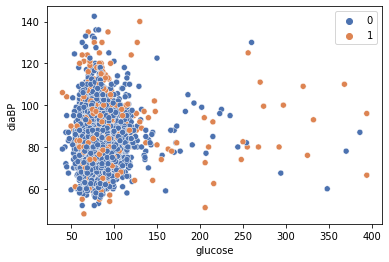

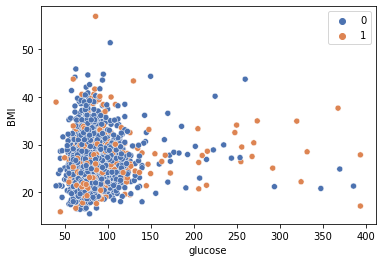

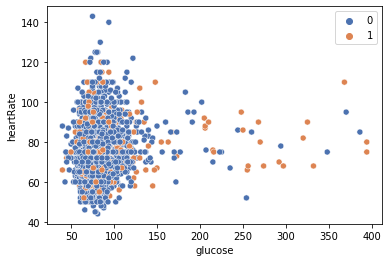

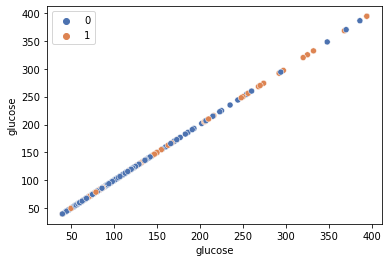

In [18]:
scatter_plot(data,numerical)

In [26]:
def plot_bar(data,numericCols,categoricalCols,response='TenYearCHD'):
    for i in numericCols:
                for j in categoricalCols:
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
                    #sns.kdeplot(data=data, x=i, hue=response, fill=True, 
                                #common_norm=False, palette="crest", alpha=.5, linewidth=0,)
                    #sns.swarmplot(x=j, y=i, hue=response, data=data)
                    plt.show()

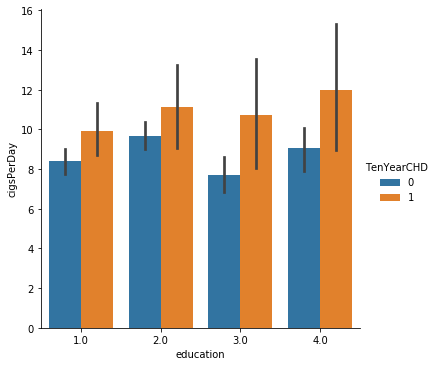

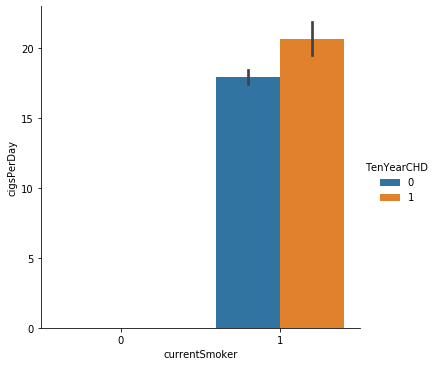

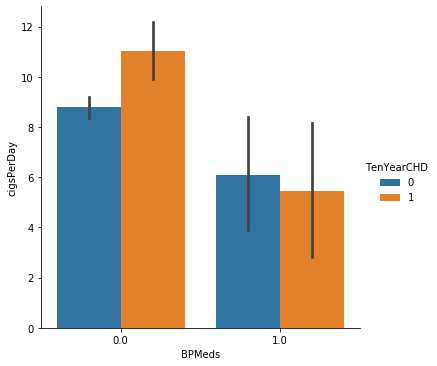

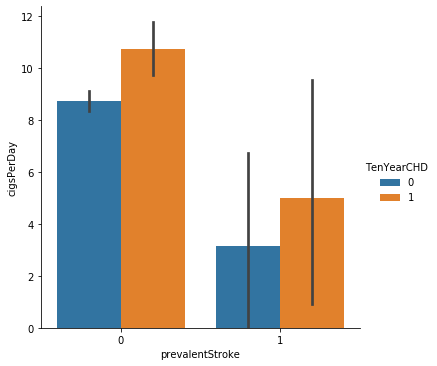

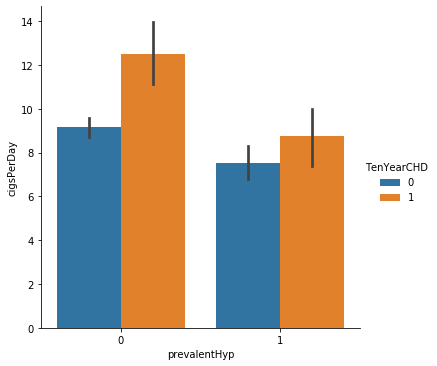

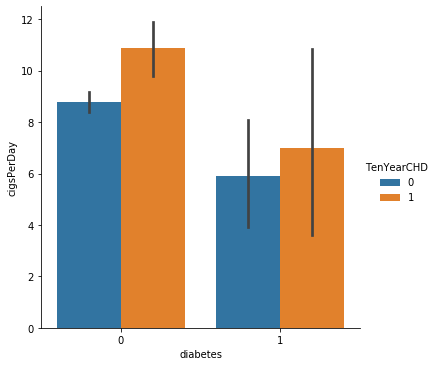

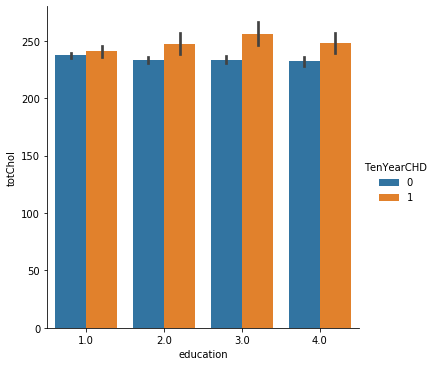

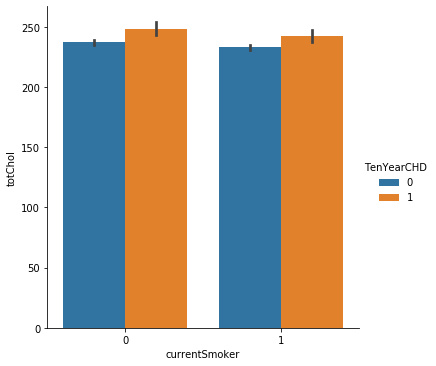

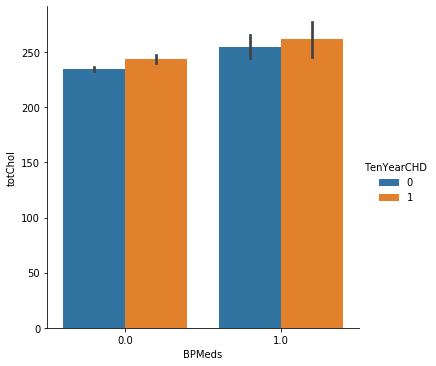

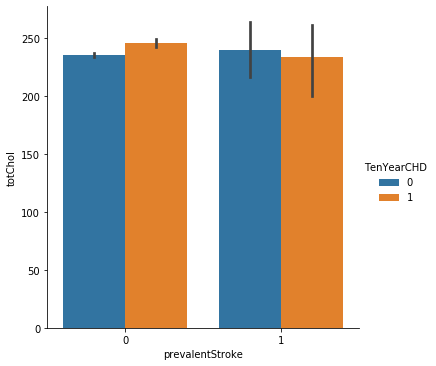

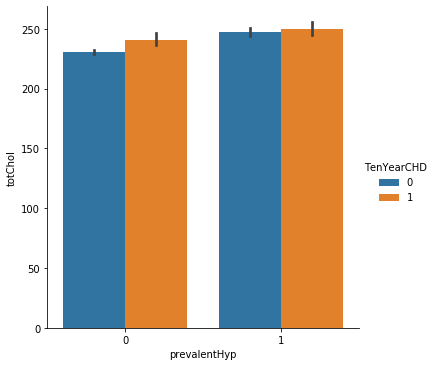

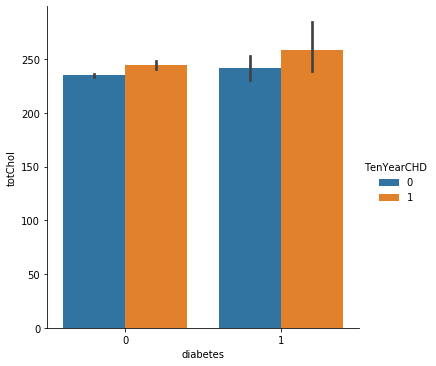

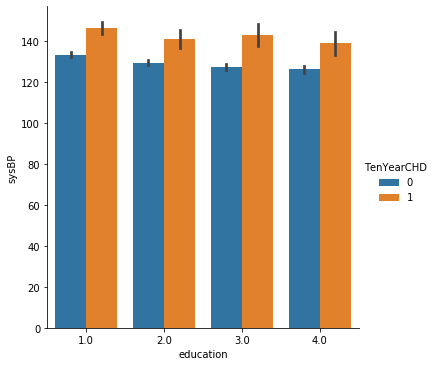

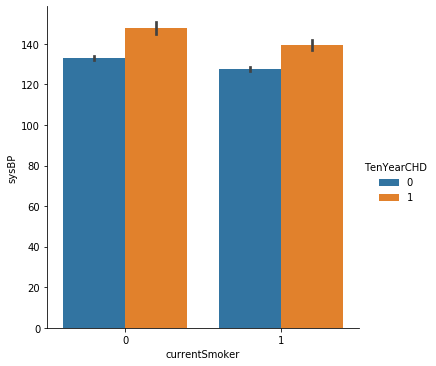

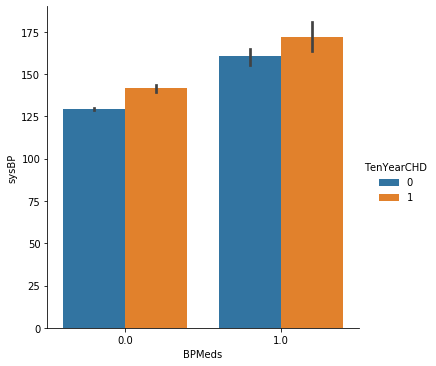

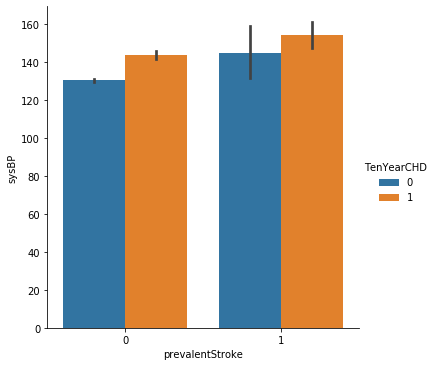

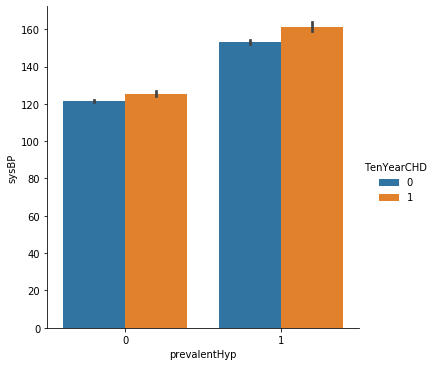

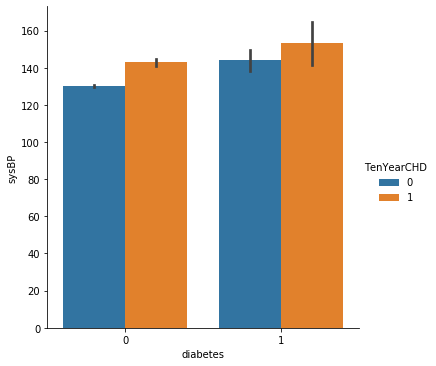

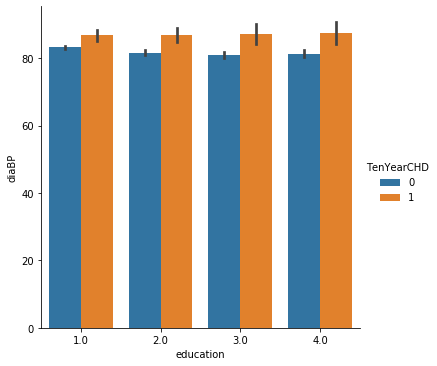

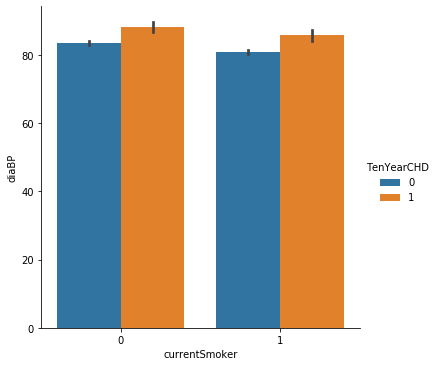

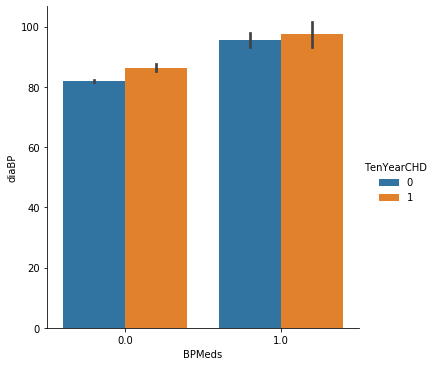

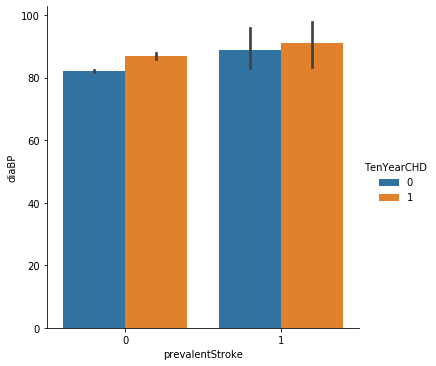

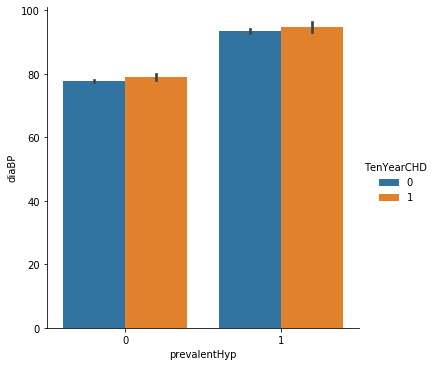

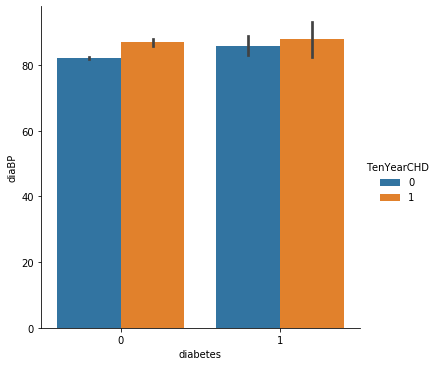

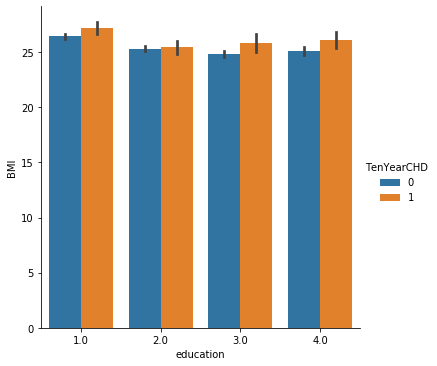

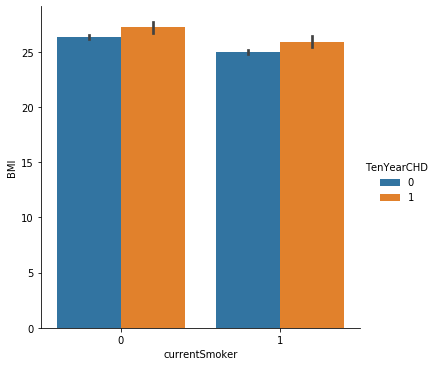

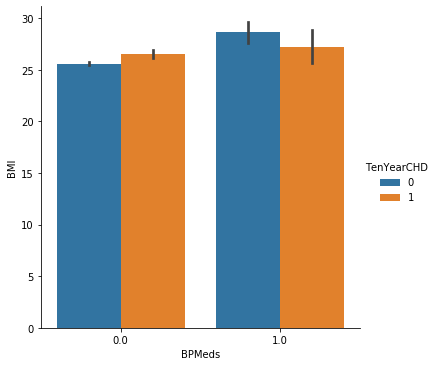

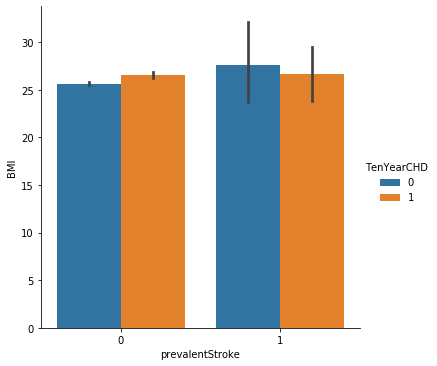

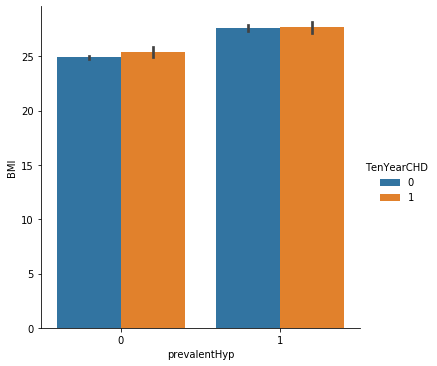

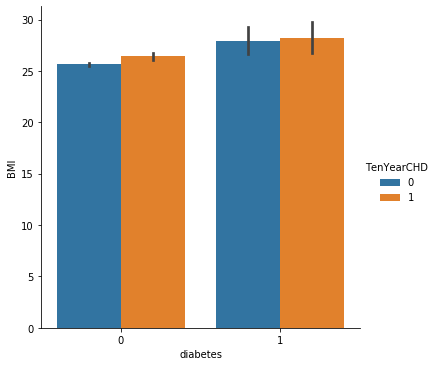

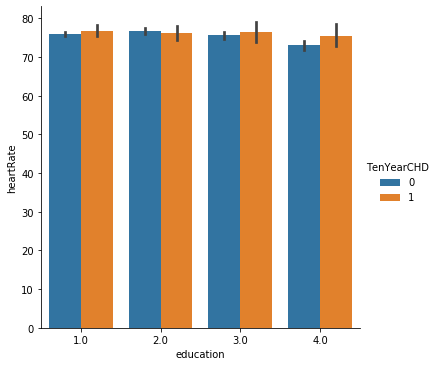

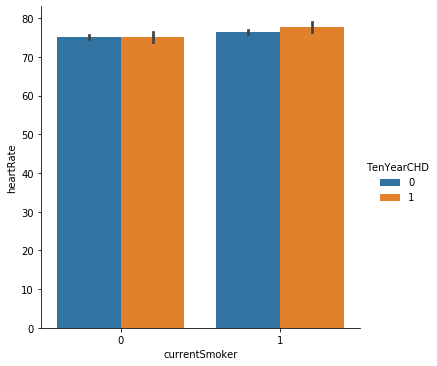

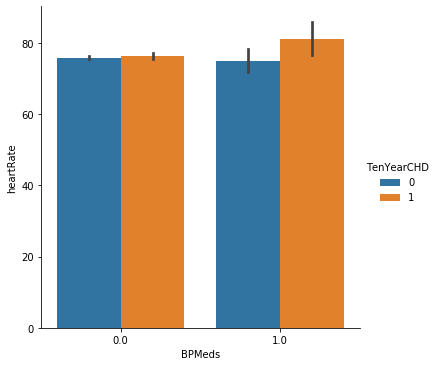

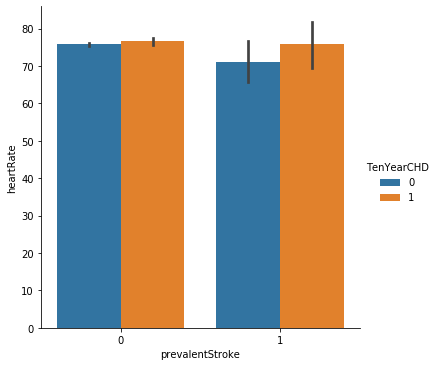

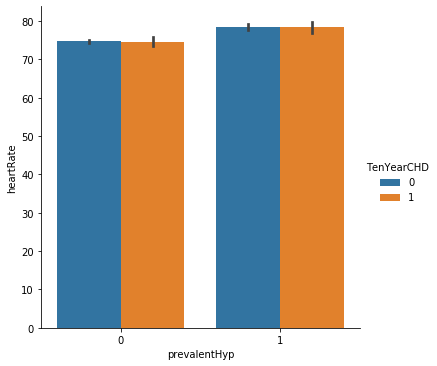

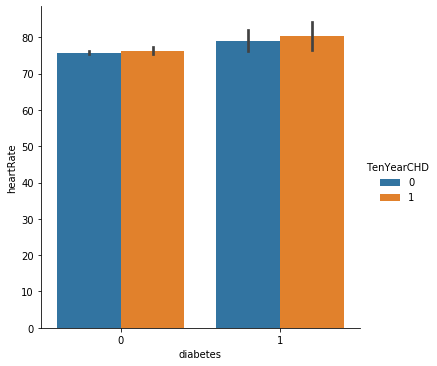

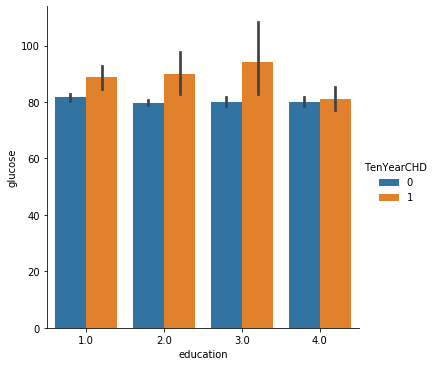

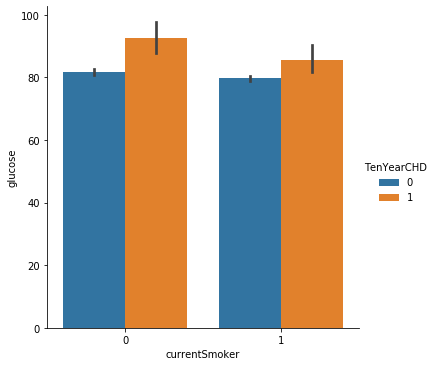

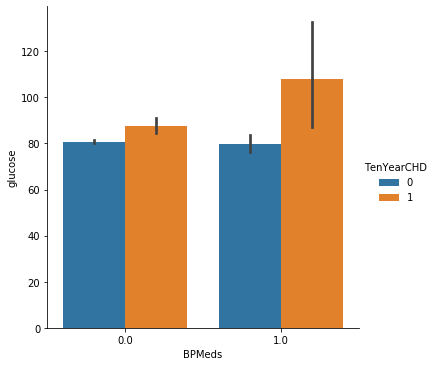

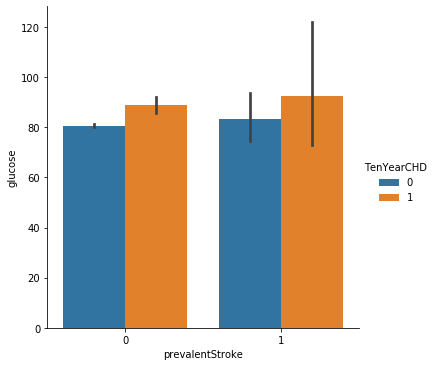

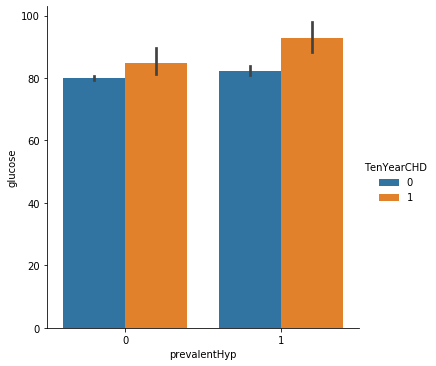

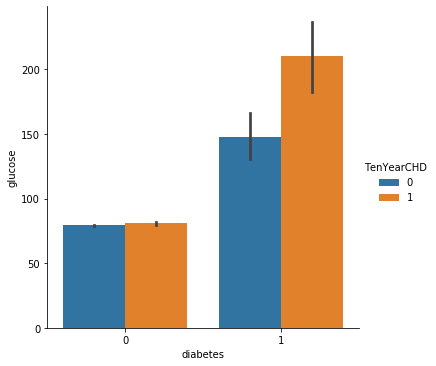

In [27]:
plot_bar(data,numerical,category)

In [28]:
def plot_swarm(data,numericCols,categoricalCols,response='TenYearCHD'):
    for i in numericCols:
                for j in categoricalCols:
                    #sns.jointplot(x=response, y=i, data=data)
                    #sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
                    sns.kdeplot(data=data, x=i, hue=response, fill=True, 
                                common_norm=False, palette="crest", alpha=.5, linewidth=0,)
                    sns.swarmplot(x=j, y=i, hue=response, data=data)
                    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


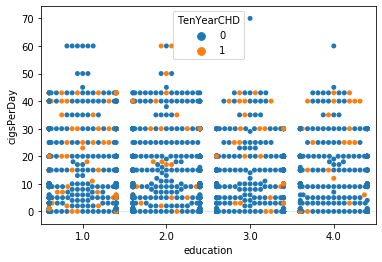

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


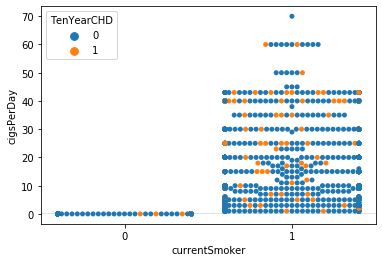

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


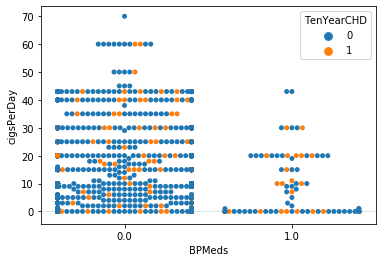

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


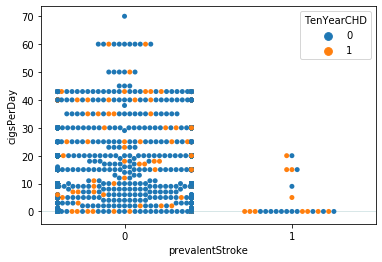

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


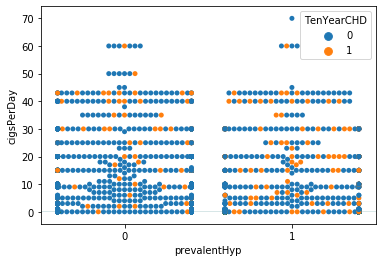

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


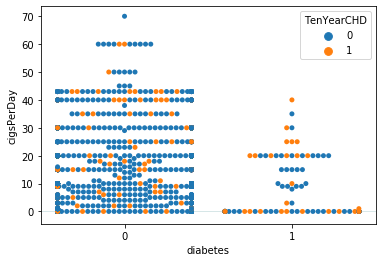

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


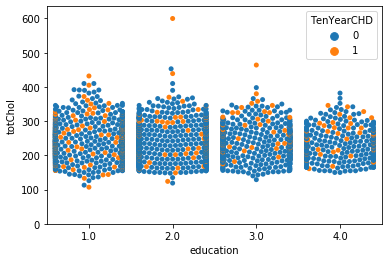

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


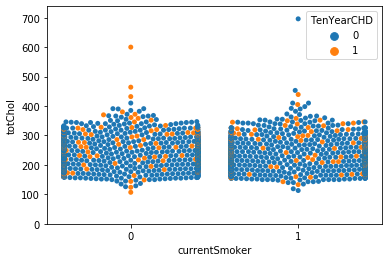

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


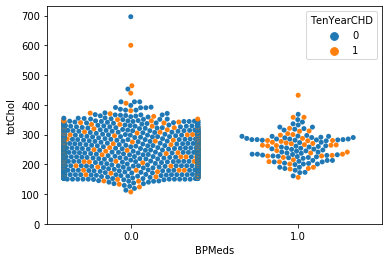

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


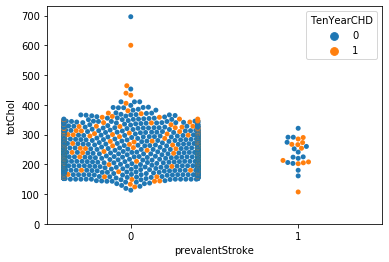

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


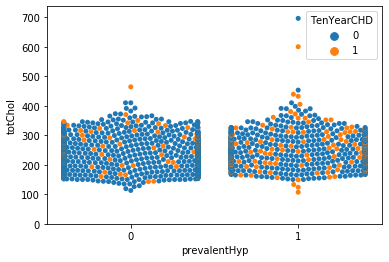

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


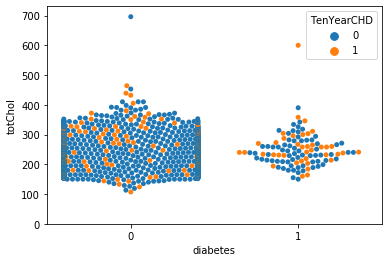

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


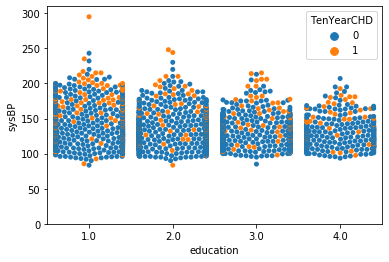

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


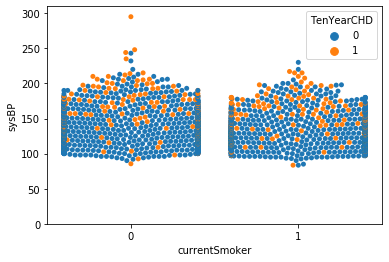

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


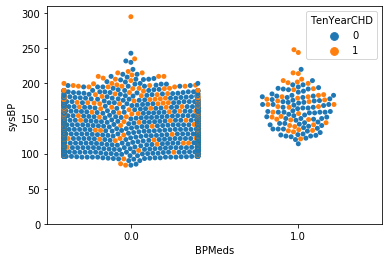

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


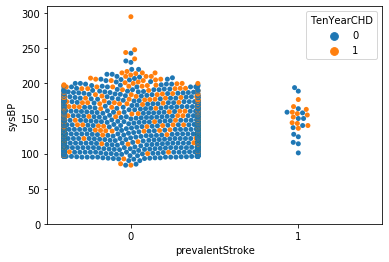

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


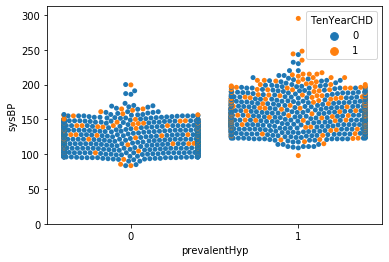

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


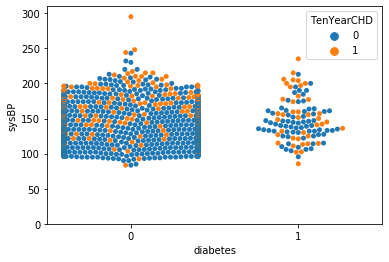

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


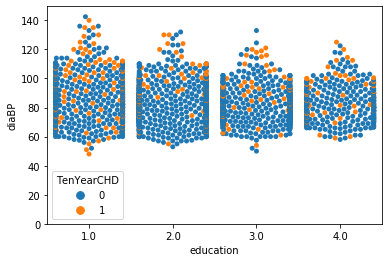

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


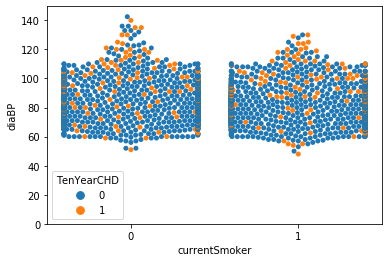

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


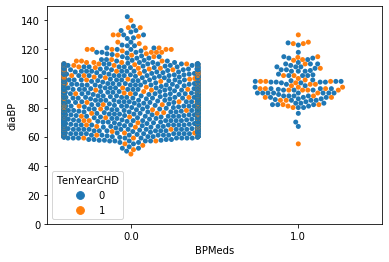

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


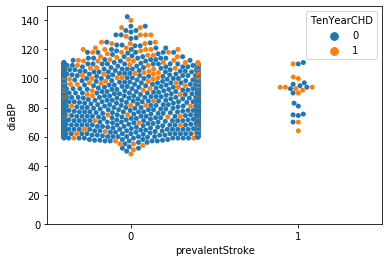

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


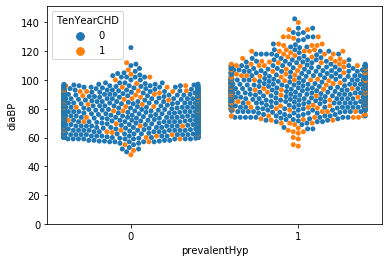

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


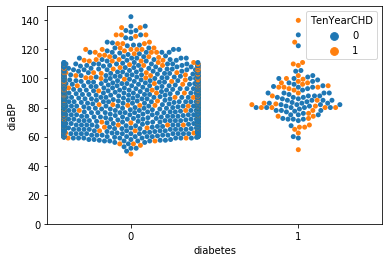

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


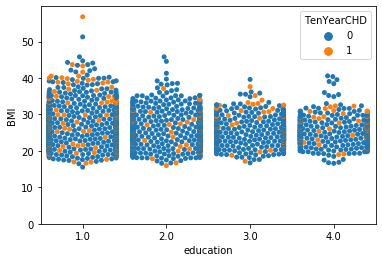

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


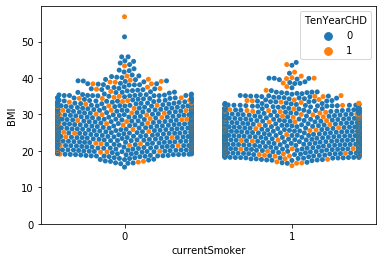

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


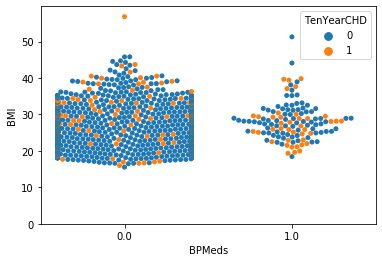

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


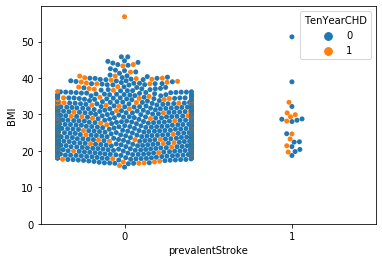

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


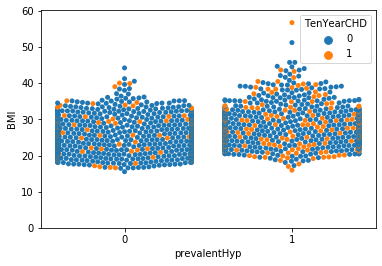

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


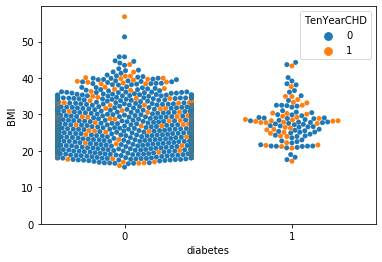

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


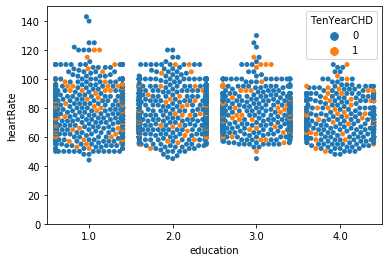

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


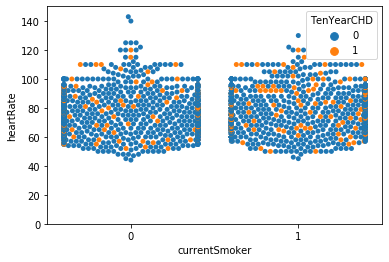

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


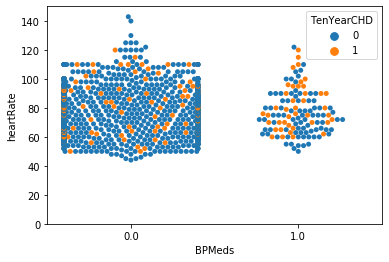

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


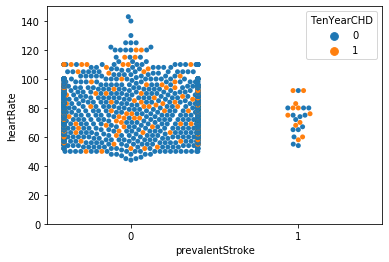

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


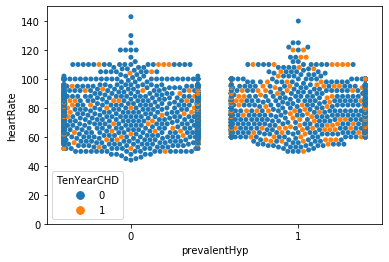

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


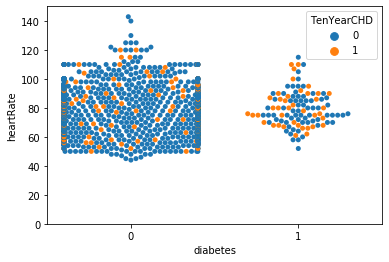

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


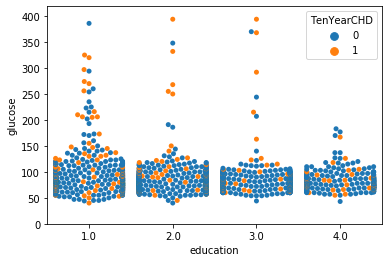

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


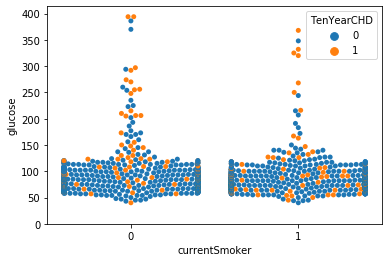

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


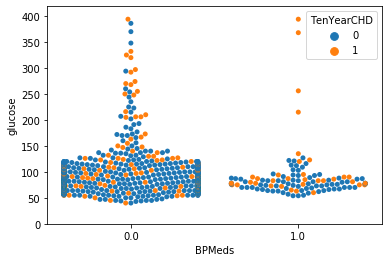

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


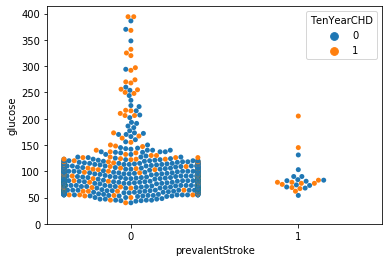

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


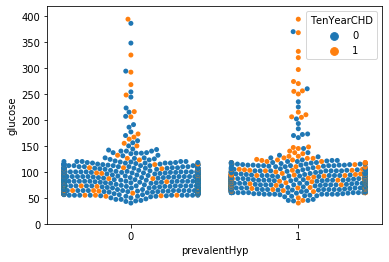

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


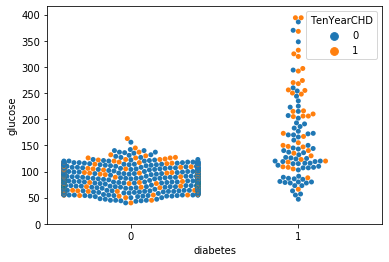

In [29]:
plot_swarm(data,numerical,category)


In [34]:
 def count_plot(data,numericCols,response='TenYearCHD'):
    for i in numericCols:
                for j in [response]:
                    plt.figure(figsize=(15, 7))
                    plt.subplot(121)
                    graph = sns.countplot(y=data[i],
                                          palette="Set2",
                                          order=data[i].value_counts().index[:500])
                    plt.title("Distribution of " + i)
                    plt.show()

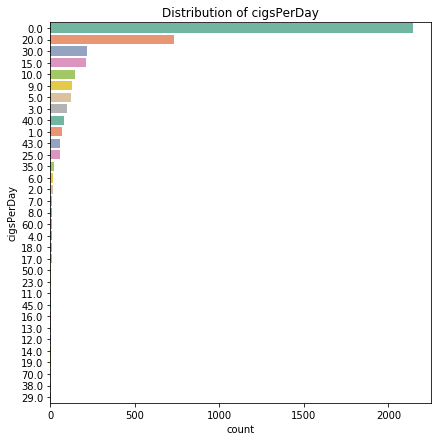

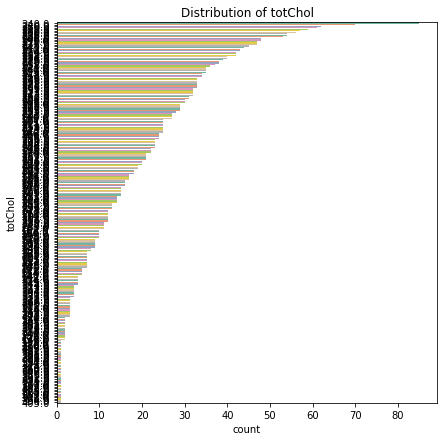

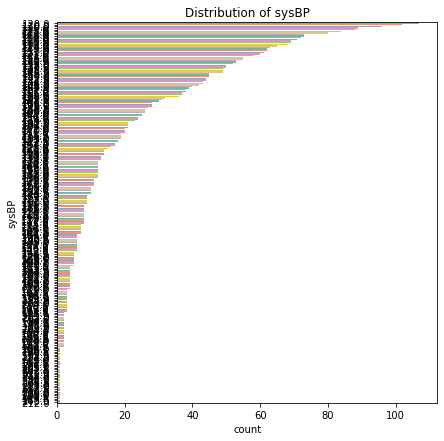

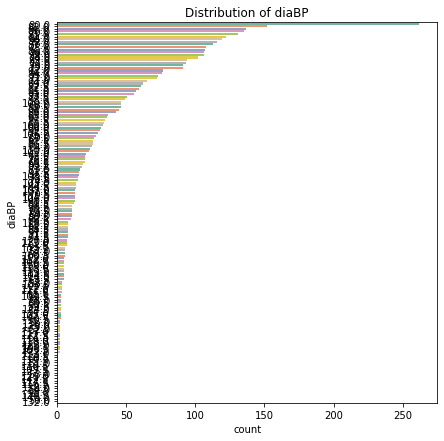

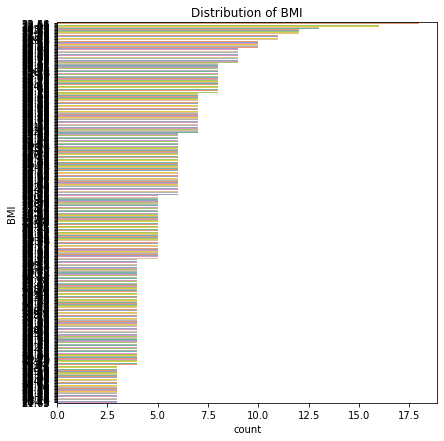

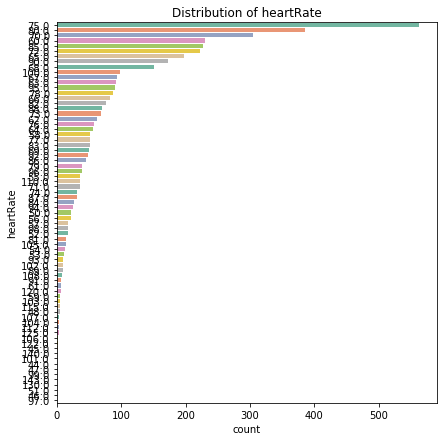

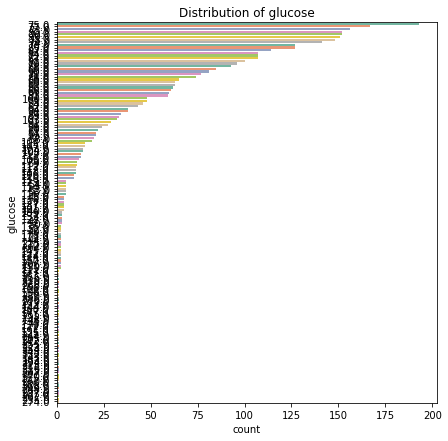

In [35]:
count_plot(data,numerical)

In [41]:
def plotSeries(data, seriesCols, xCol, dpi=100, response='TenYearCHD'):
        try:
            #plt.figure(figsize=(16,8), dpi=dpi)
            fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
            #fig, axes = plt.subplots(nrows=round(len(seriesCols)/2)+1, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k")
            #x = data[xCol]
            #colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
            
            for i in range(len(seriesCols)):  
                #m = seriesCols[i]
                #y=data[m]
                #y.index = data[xCol]
                #c = colors[i % (len(colors))]
                
                sns.catplot( x=xCol, y=seriesCols[i], data=data, kind='bar', palette="Set2")
                plt.xticks(rotation=90)
                plt.title("Average value of " + seriesCols[i])
                plt.show()
                percentageDistribution(data, seriesCols[i], response)
                sns.countplot(x=seriesCols[i], data=data,
                                          palette="Set2")
                plt.title("Distribution of " + seriesCols[i])
                plt.show()
                #ax = y.plot(ax = axes[i // 2, i % 2],rot=25, color=c, title = 'Series plot of ' + m)
                #ax.set_ylabel(m)             
                #plt.show()

        except Exception as exp:
            #self.errObj = ErrorHandler()
            #err = self.errObj.handleErr(str(exp))
            print("in the expect")

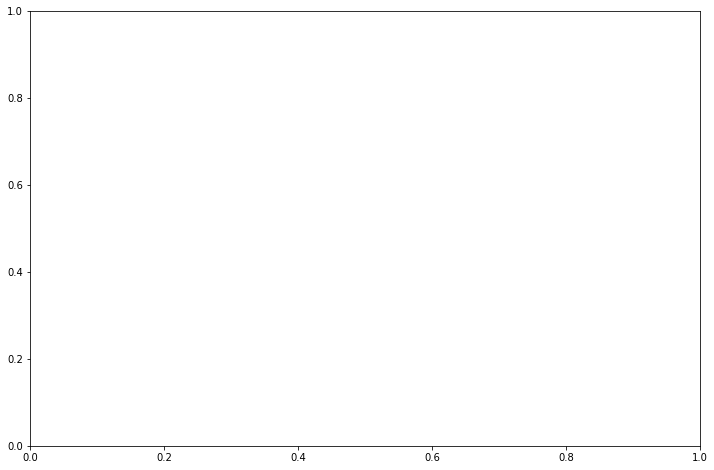

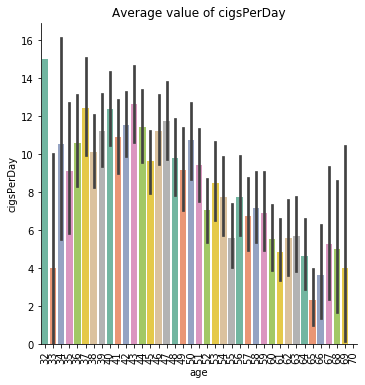

in the expect


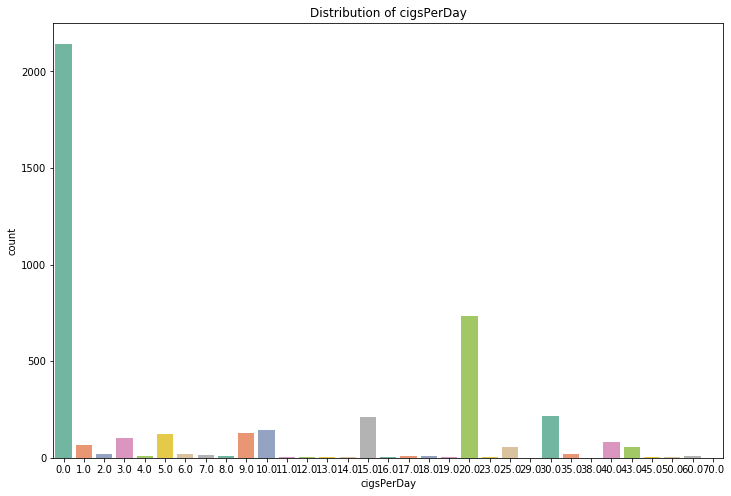

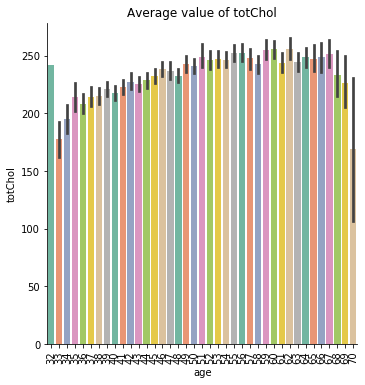

in the expect


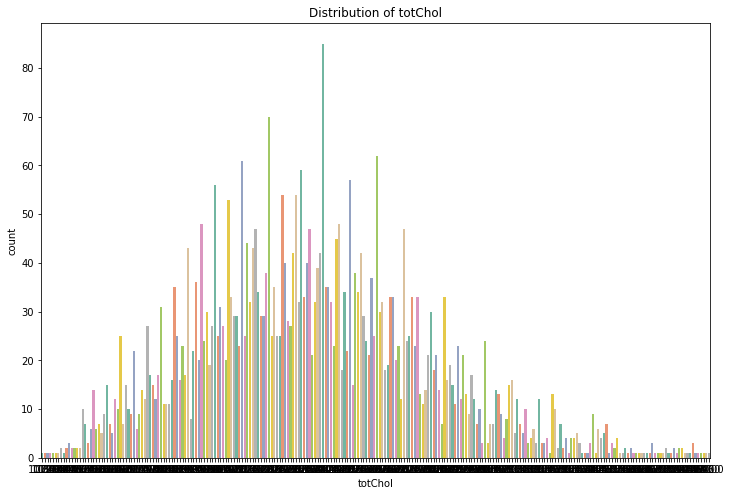

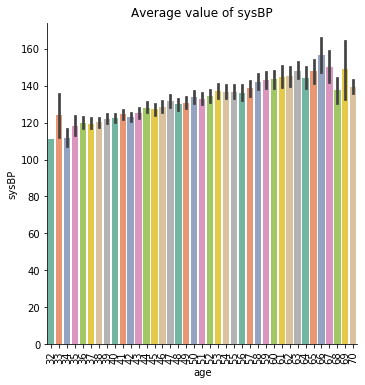

in the expect


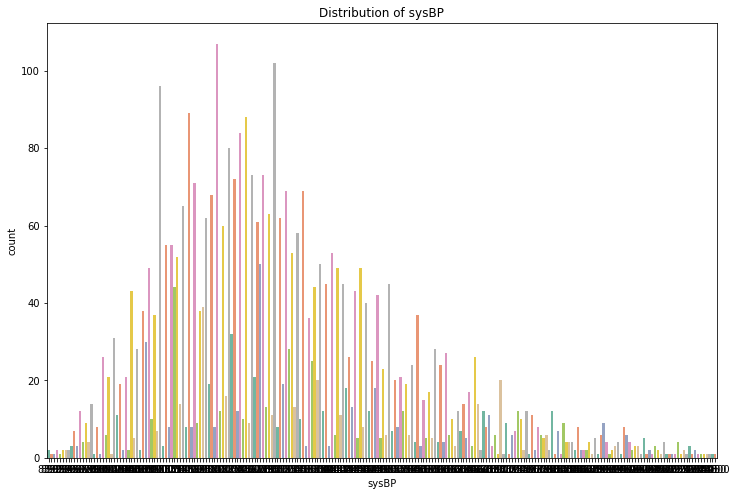

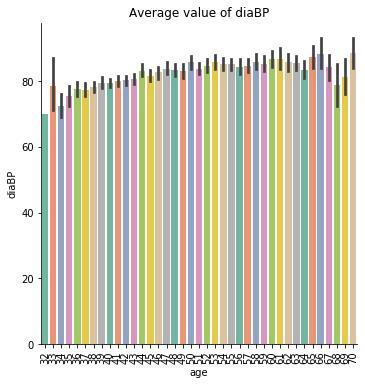

in the expect


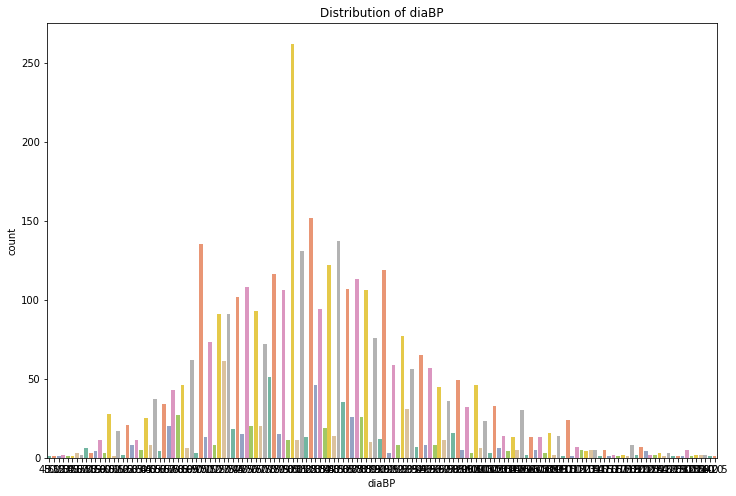

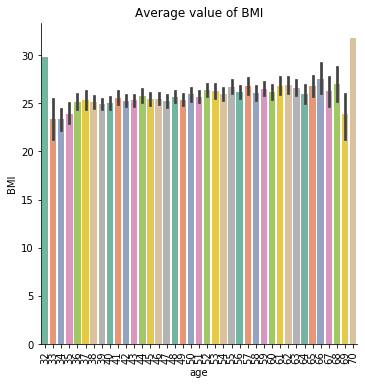

in the expect


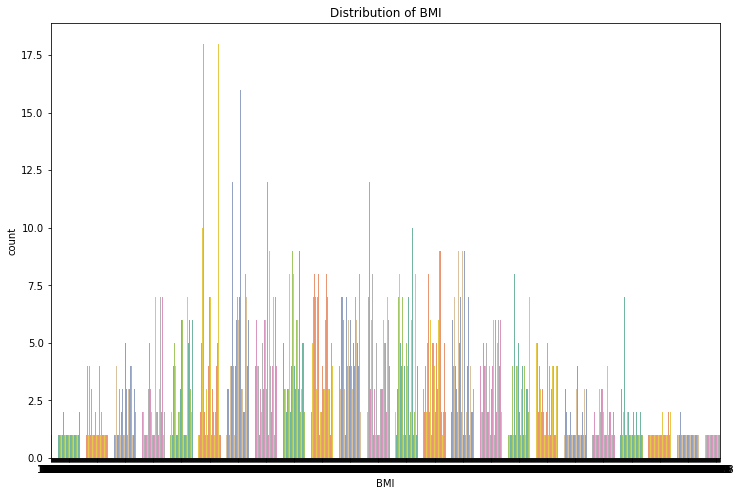

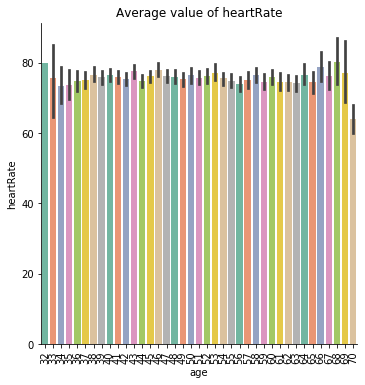

in the expect


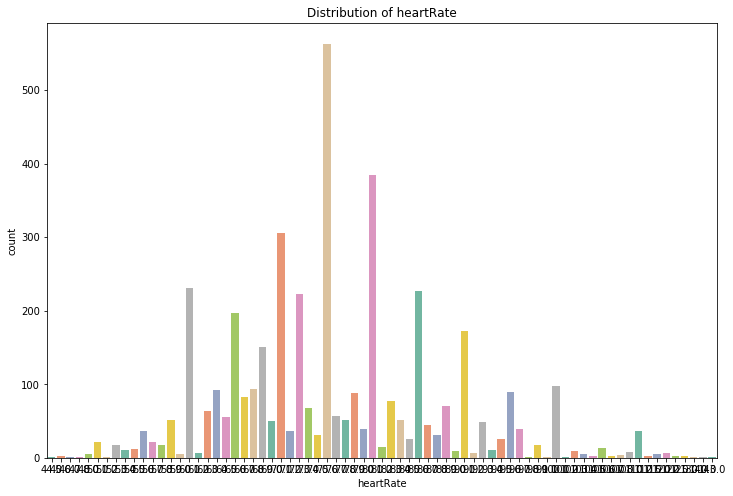

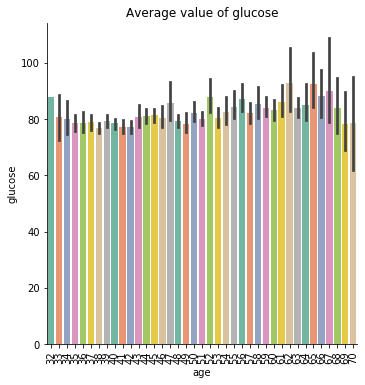

in the expect


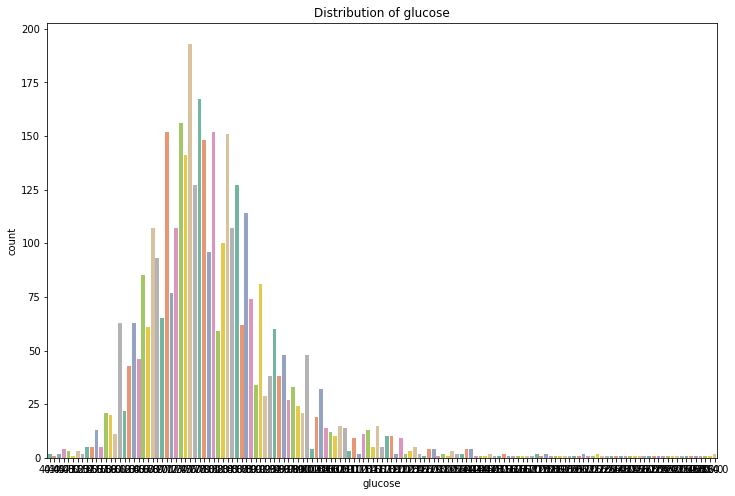

In [42]:
plotSeries(data, numerical, 'age', dpi=100)

In [43]:
def box_plot(data,numericCols):
    sns.set_theme(style="whitegrid")
    for i in numericCols:
        ax = sns.boxplot(x=data[i])
        plt.title("Box plot of " + i)
        plt.show()

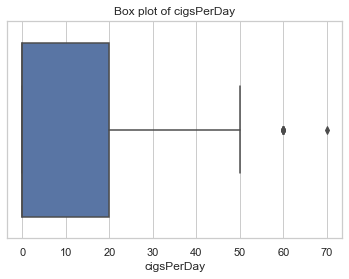

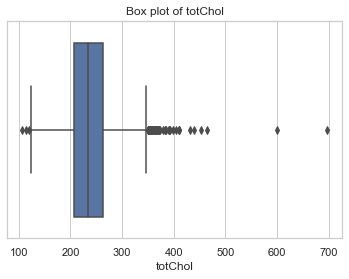

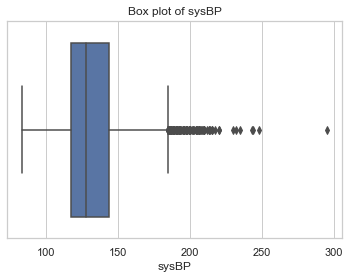

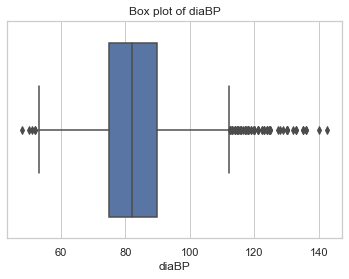

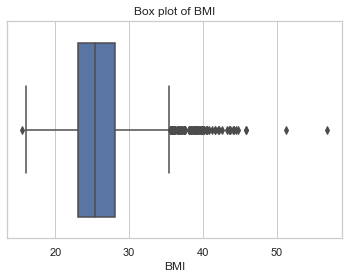

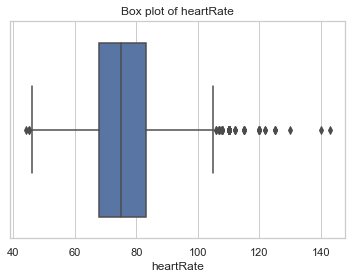

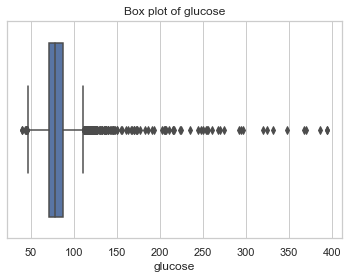

In [44]:
box_plot(data, numerical)

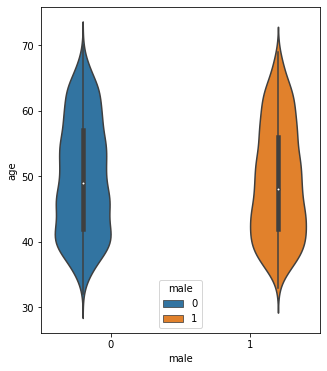

In [13]:
plt.figure(figsize = (5,6))
sns.violinplot(x="male", y="age",hue="male", data=data)

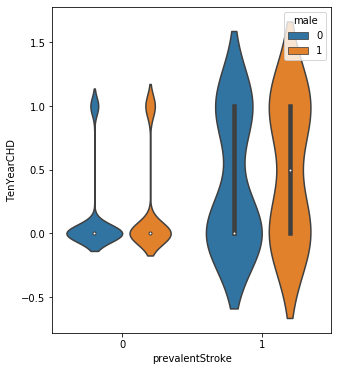

In [14]:
plt.figure(figsize = (5,6))
sns.violinplot(x="prevalentStroke", y="TenYearCHD",hue="male", data=data)

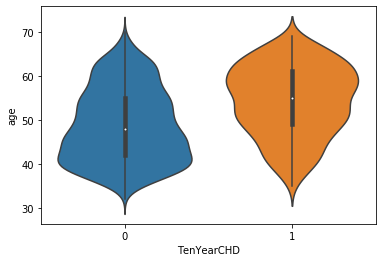

In [22]:
sns.violinplot(y='age',x='TenYearCHD',data=data)

##### Observations:
        1. Patients who got CHD are in the age group:50- 65
        2. Patients around the age group:35- 45 does not suffer from CHD mostly

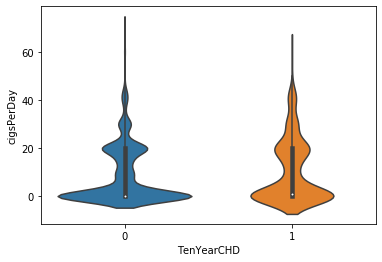

In [25]:
sns.violinplot(y='cigsPerDay',x='TenYearCHD',data=data)

#### Observations:
        1.It's weird that patients who didn't smoke suffered from CHD
        2.More the cigarretes they smoke higher chance of getting CHD

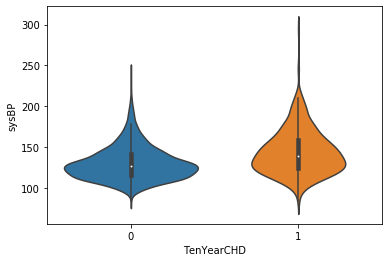

In [24]:
sns.violinplot(y='sysBP',x='TenYearCHD',data=data)

#### Observations:
        1.Patients who have higher systole BP have higher chances of getting CHD
        2.Patients whose systole BP is around 120 are mostly safe

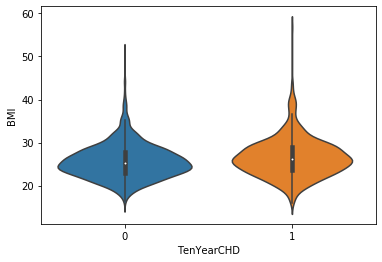

In [26]:
sns.violinplot(y='BMI',x='TenYearCHD',data=data)

#### Observations:
        It seems BMI doesn't affect chance of getting CHD

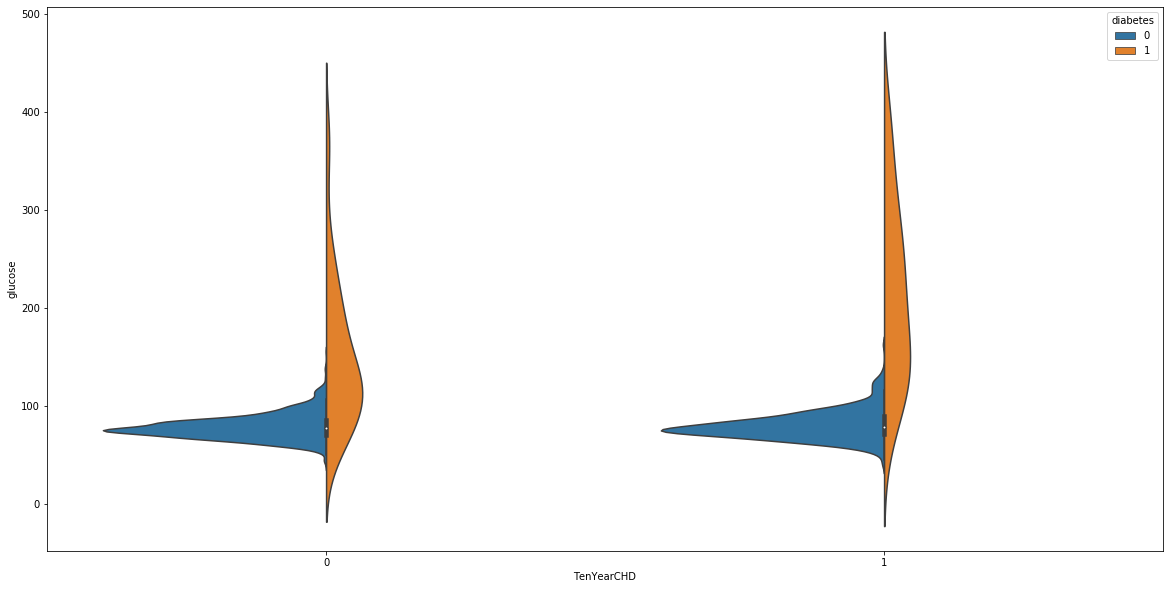

In [28]:
plt.figure(figsize=(20,10))
sns.violinplot(y='glucose',hue='diabetes',data=data,x='TenYearCHD',split=True)

In [61]:
def Boxen_plot(data,numericCols,response='TenYearCHD'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    for i in range(len(numericCols)):
              
                for j in range(len(numericCols)-1):
                    #sns.jointplot(x=response, y=i, data=data)
                
                    sns.boxenplot(data=data, x=numericCols[i], y=numericCols[j+1], scale="linear")
                    #plt.figure(figsize=(16,6))
                    #ax.legend(title=response)  # add a title to the legend
                    plt.show()

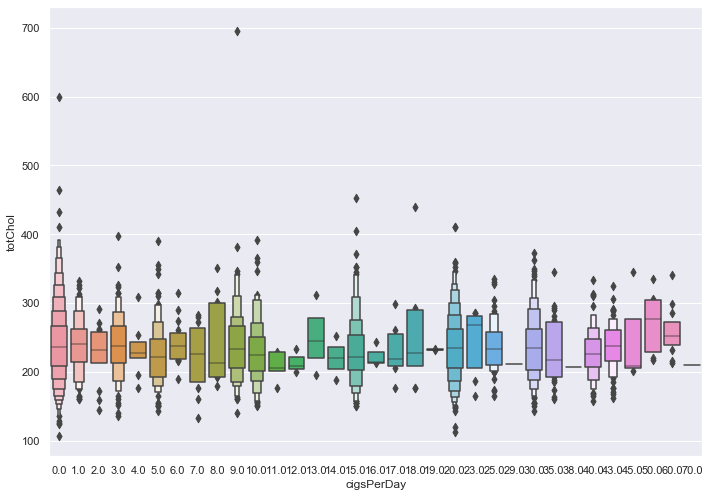

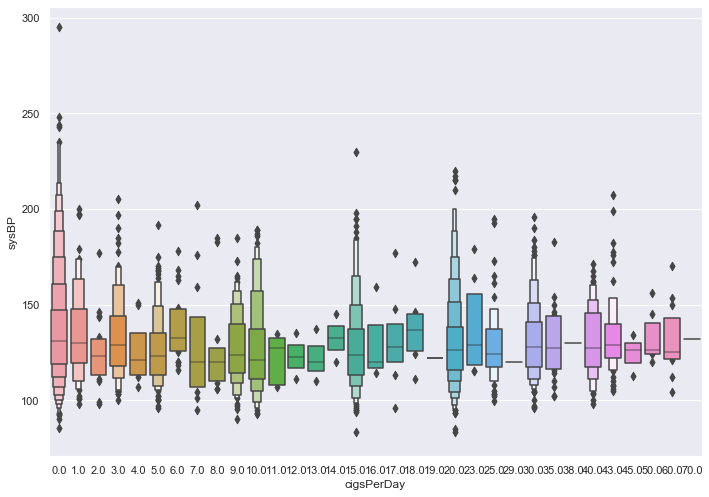

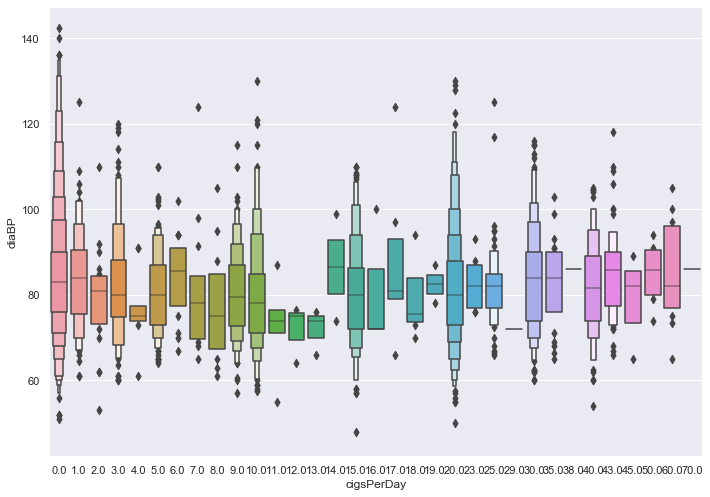

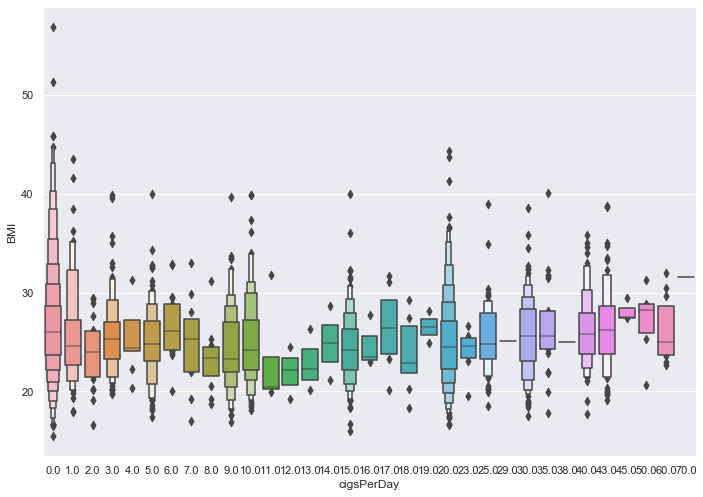

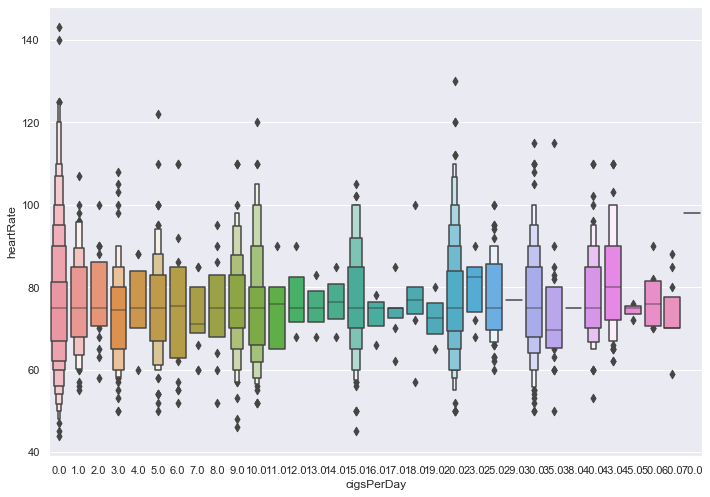

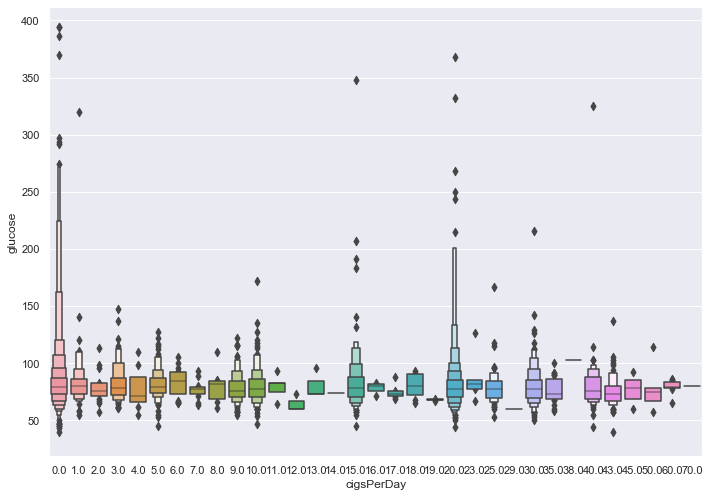

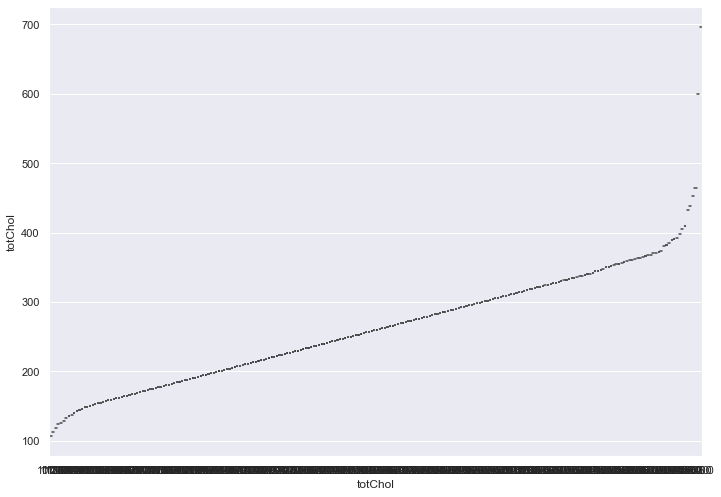

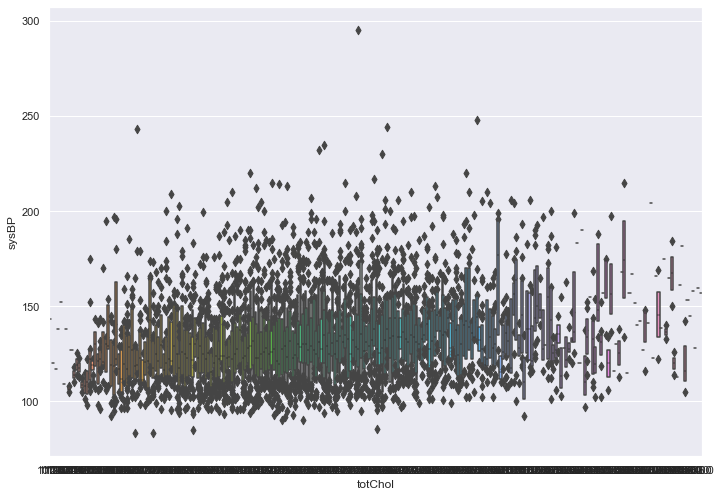

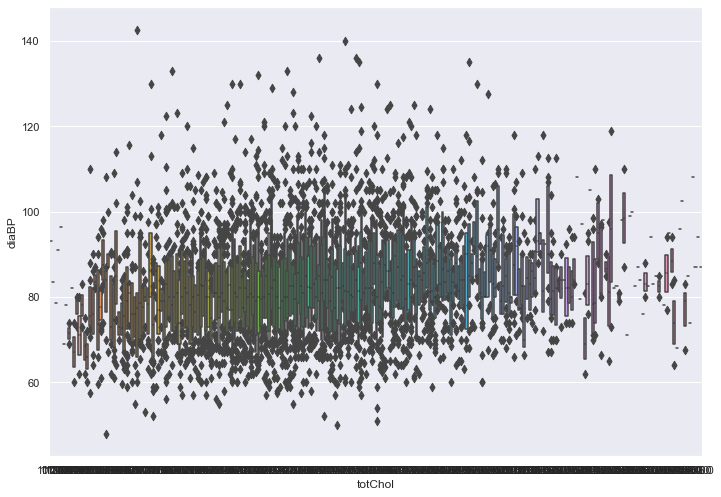

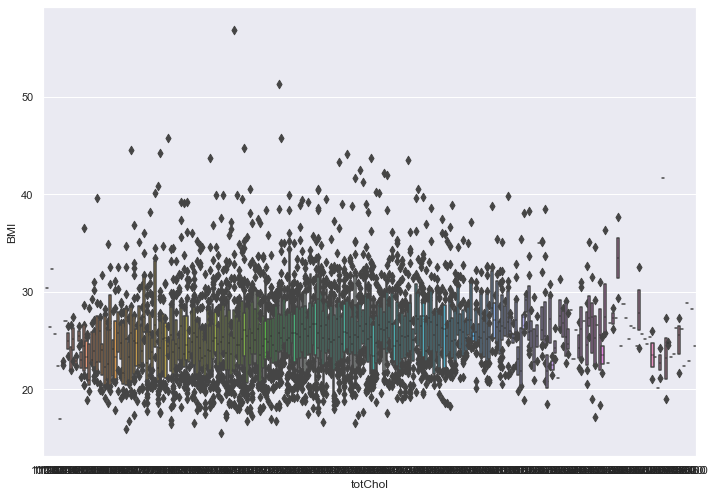

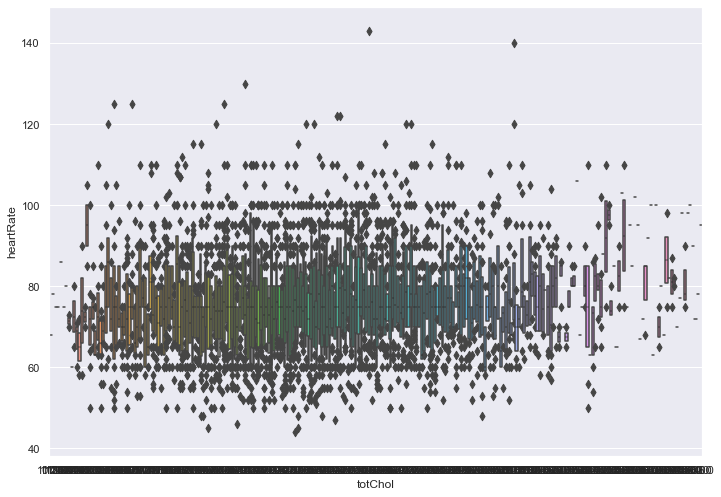

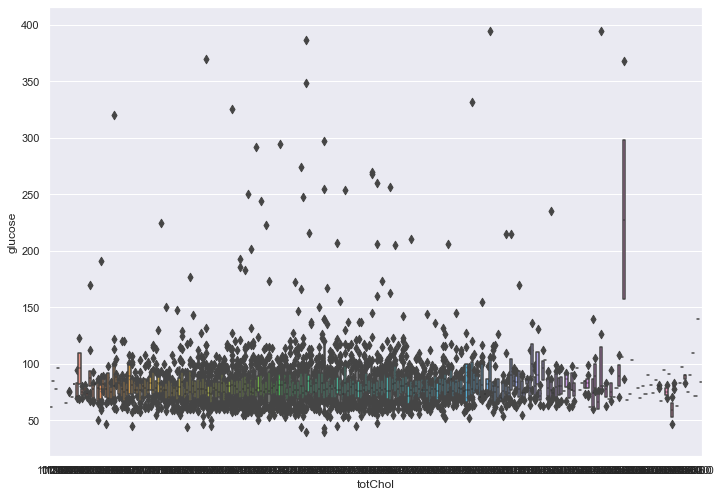

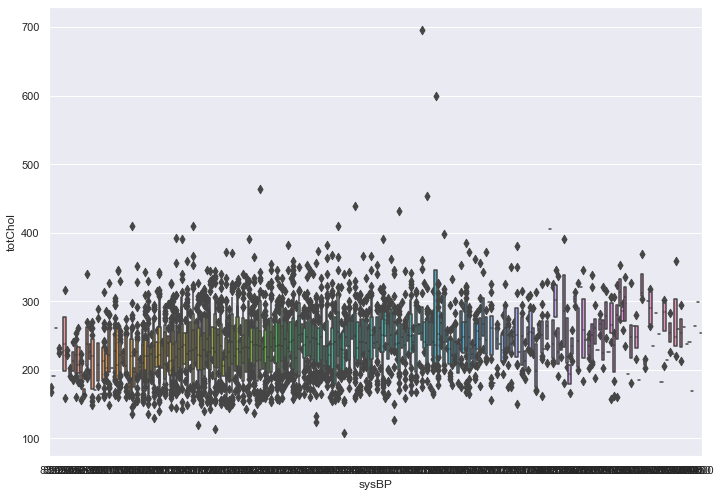

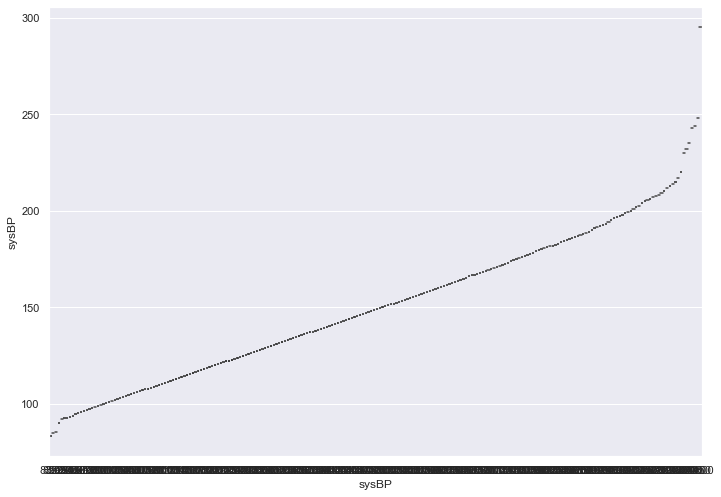

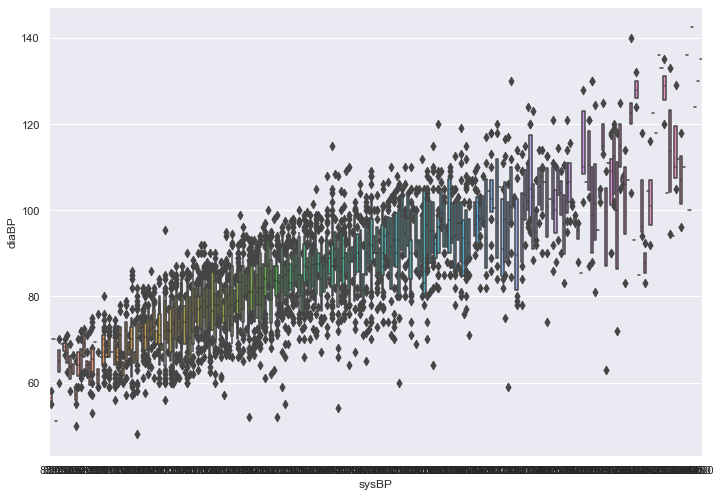

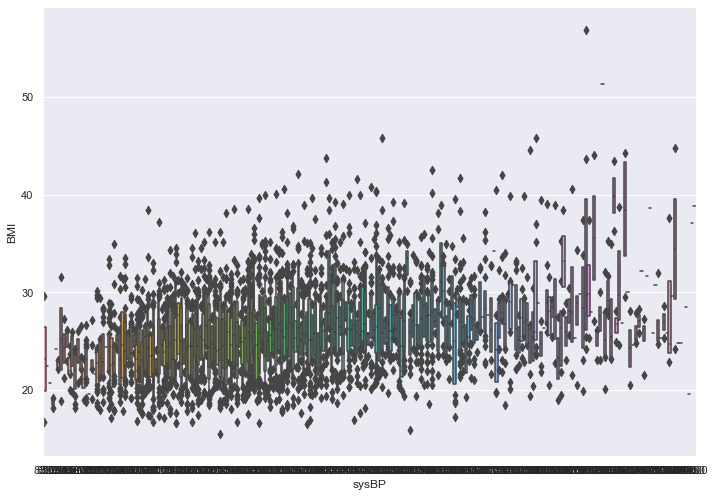

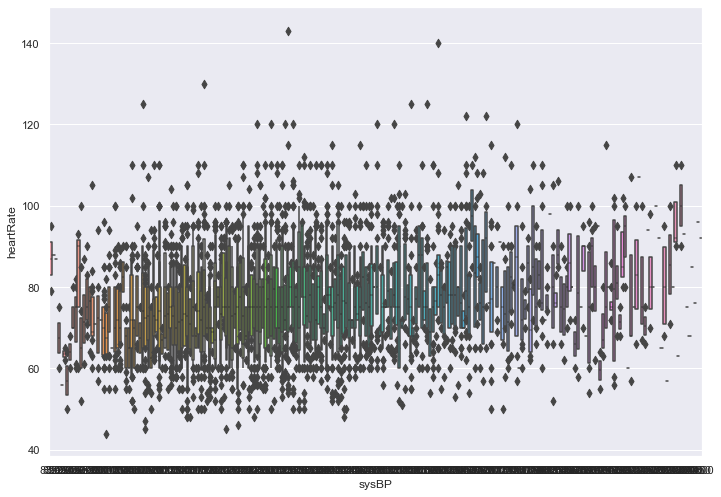

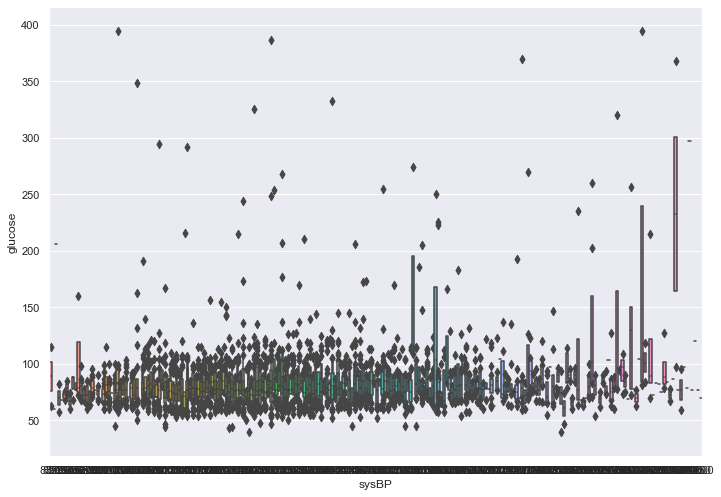

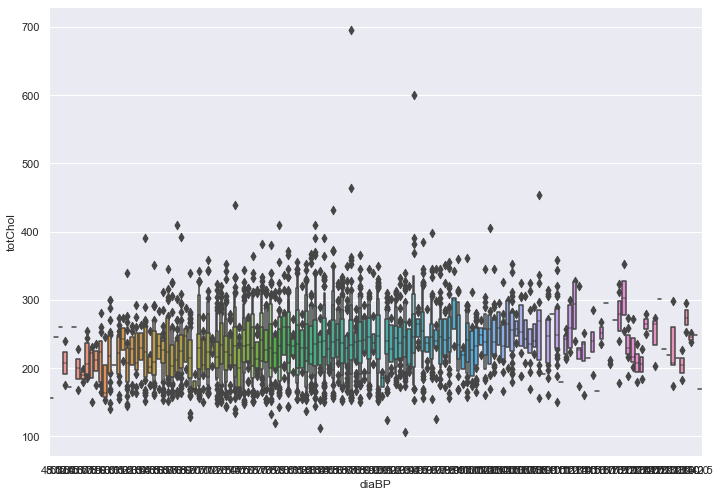

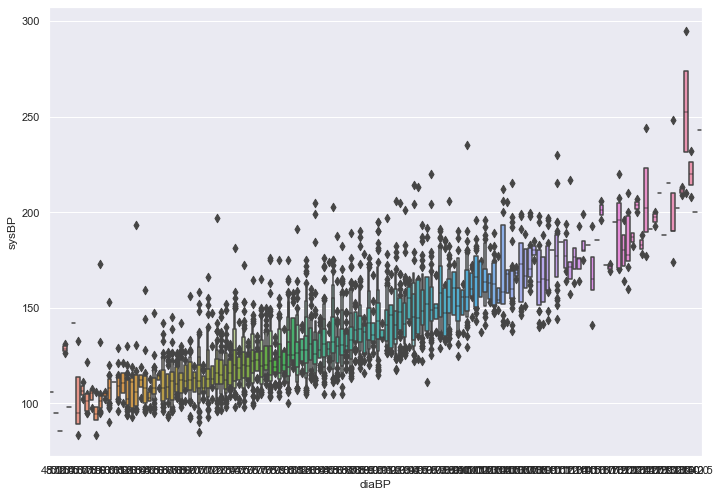

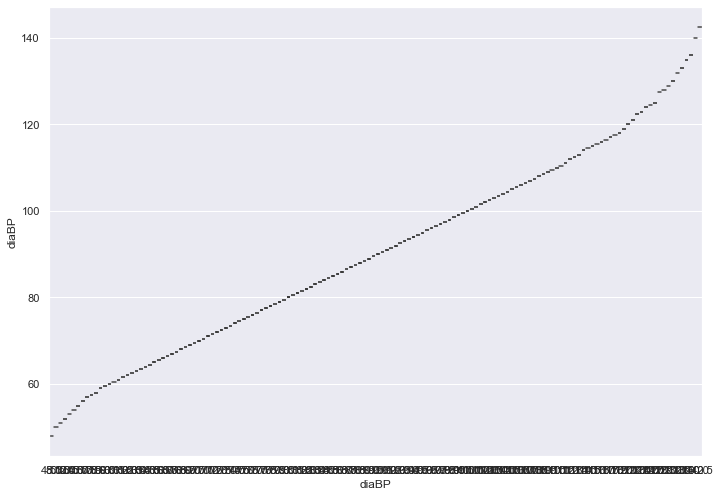

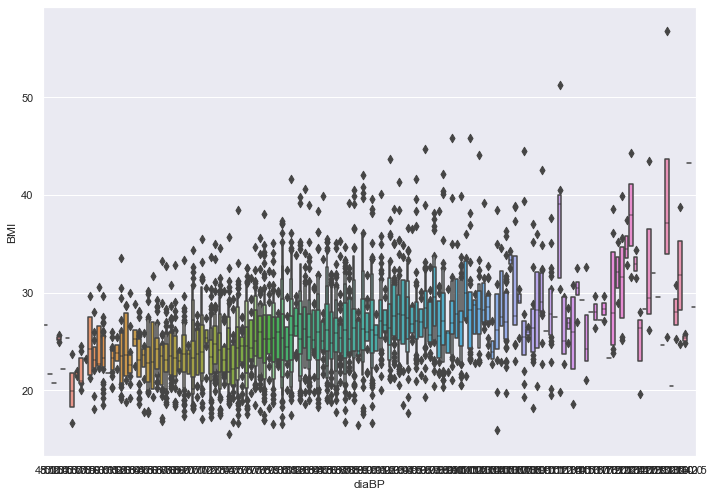

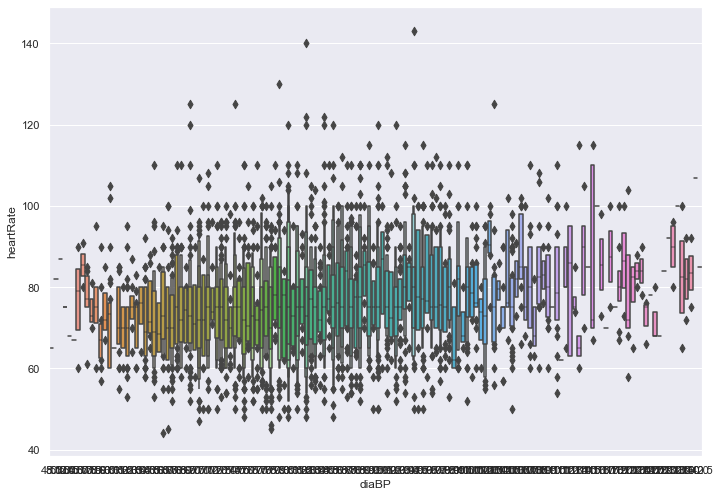

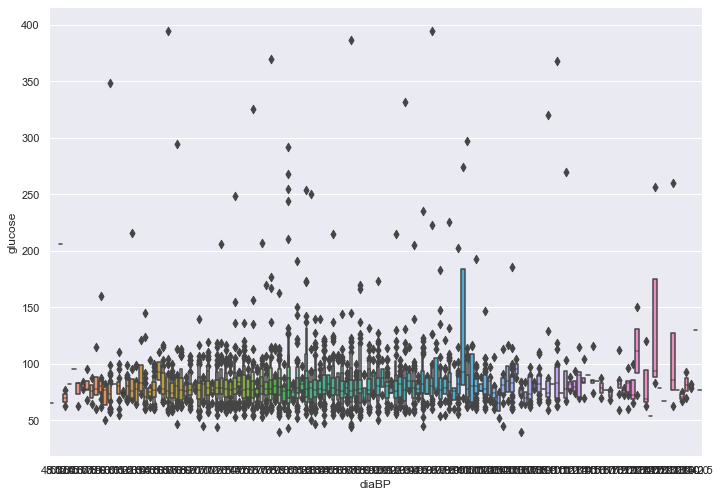

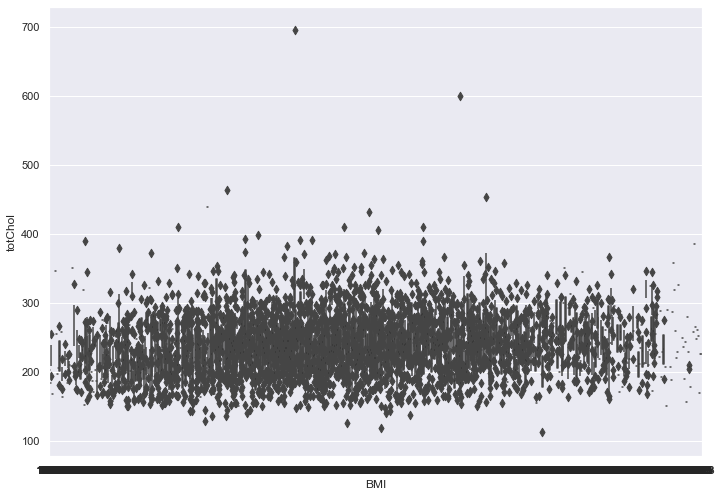

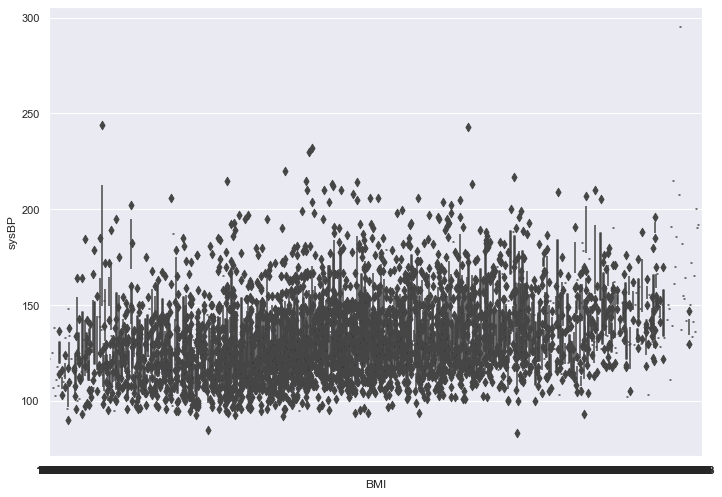

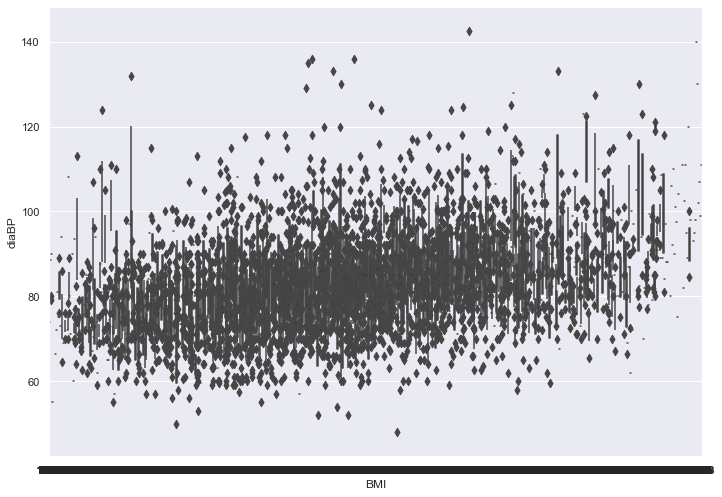

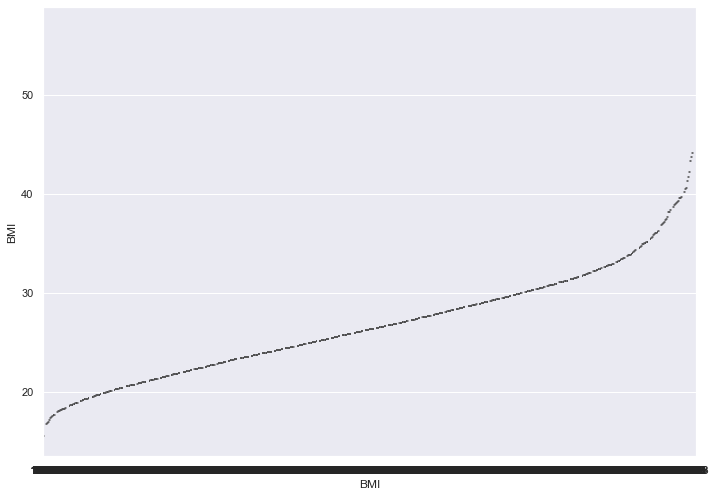

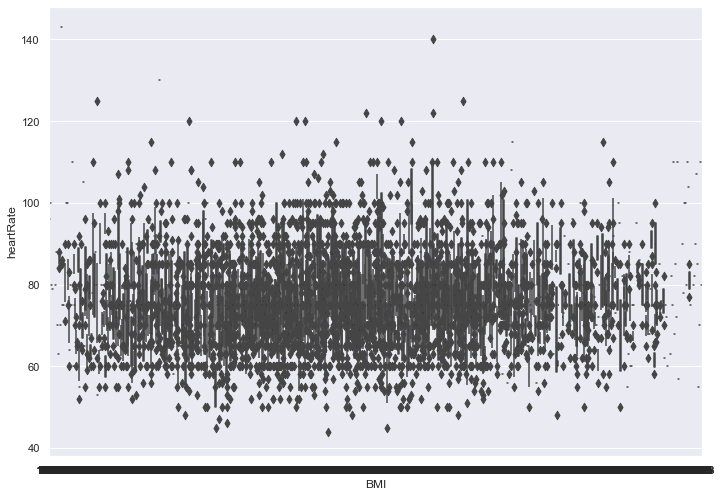

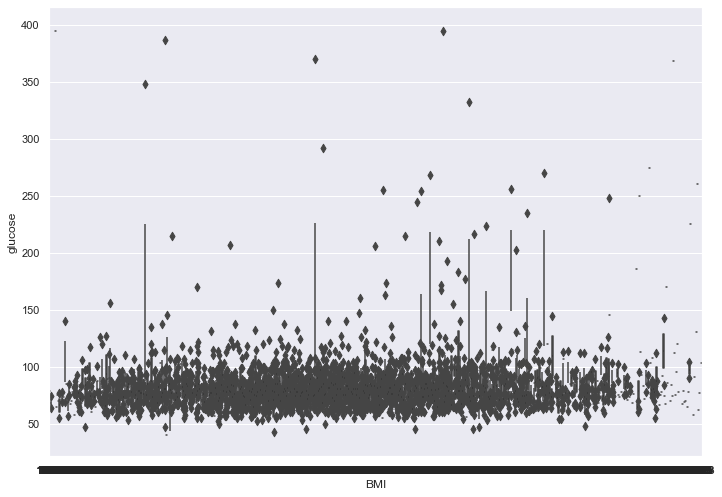

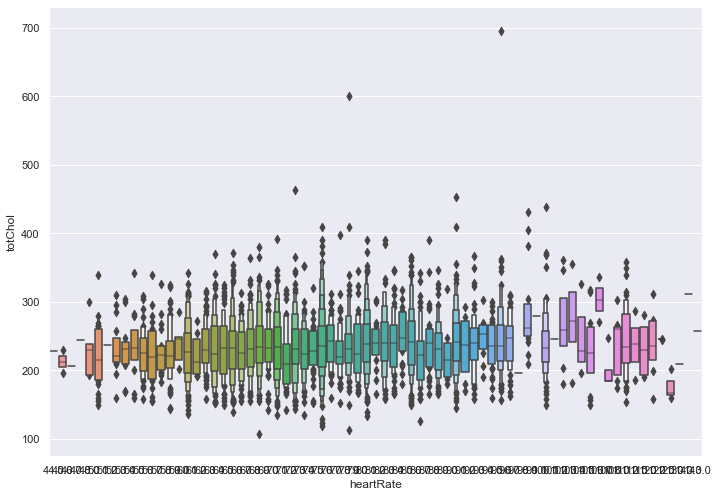

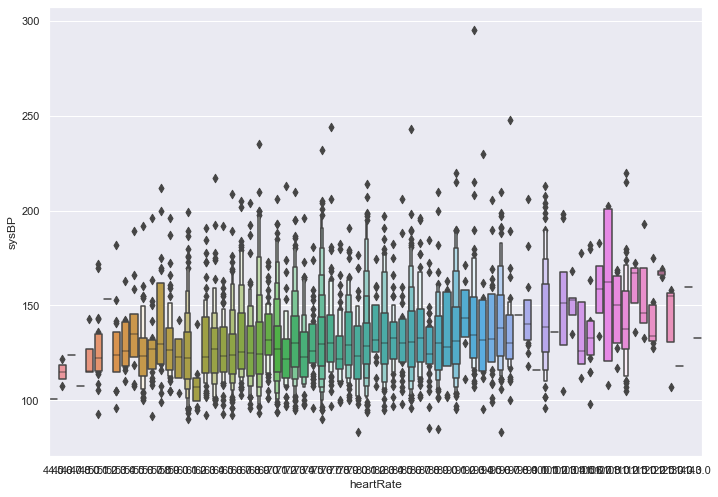

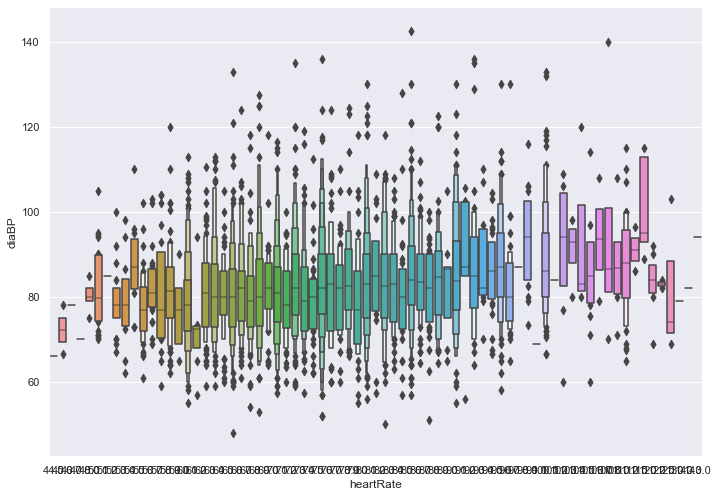

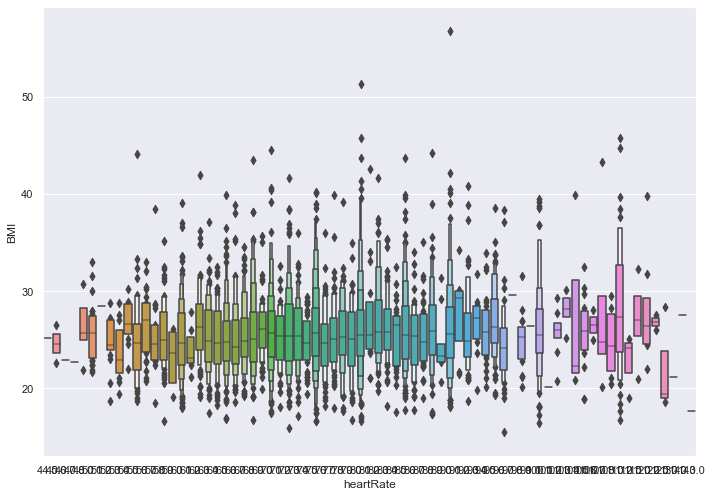

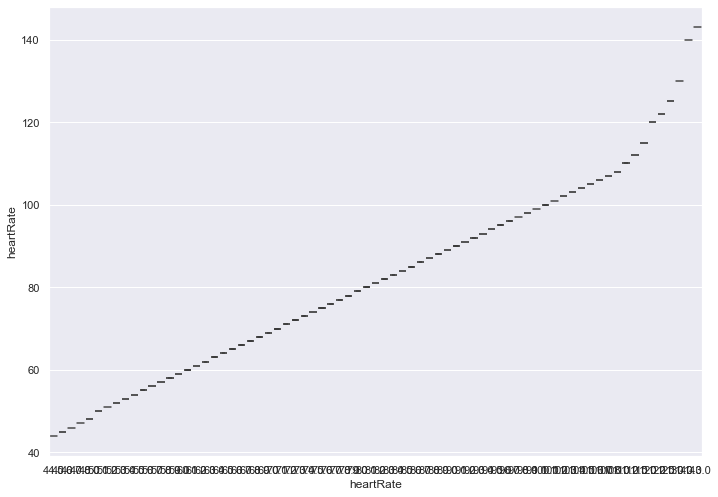

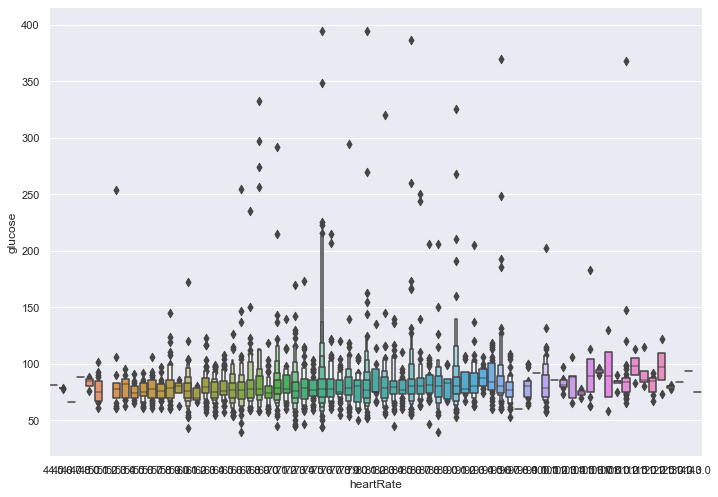

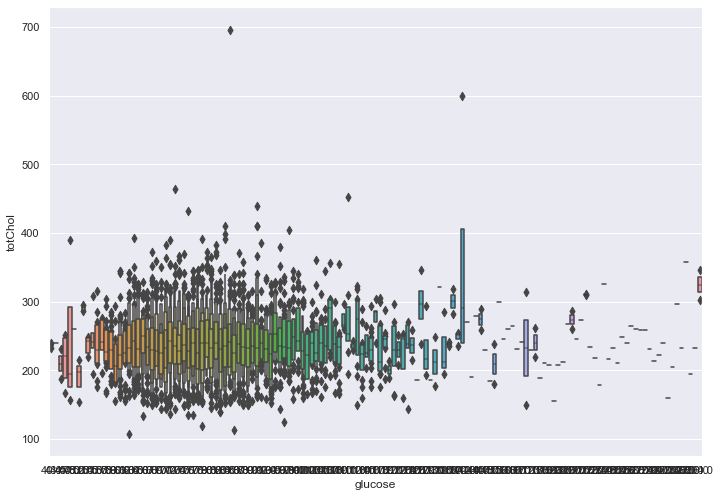

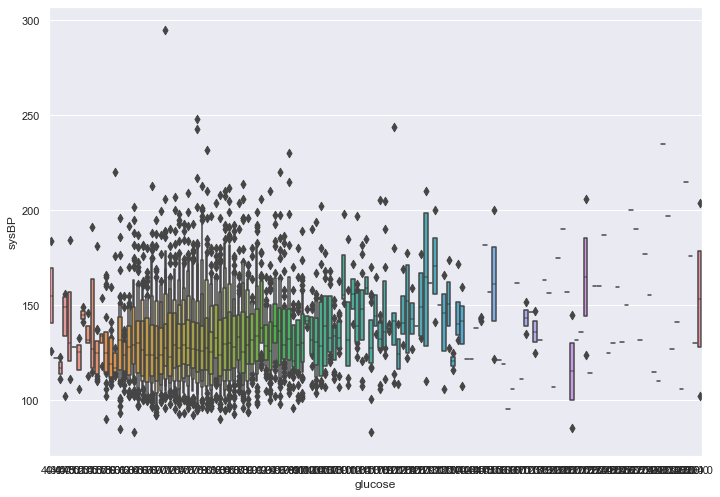

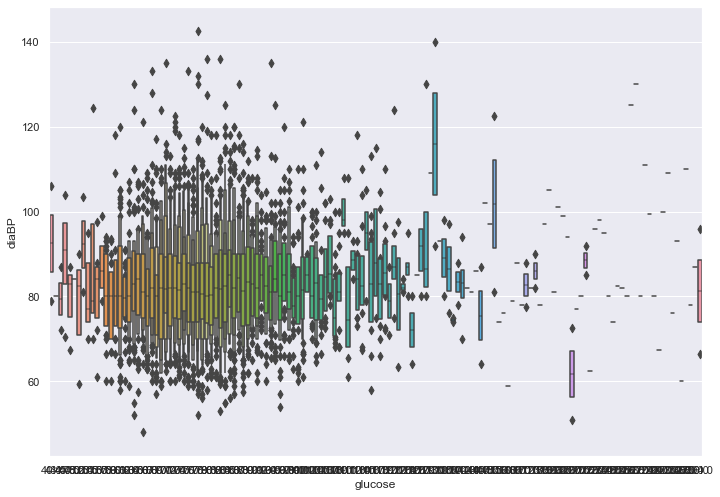

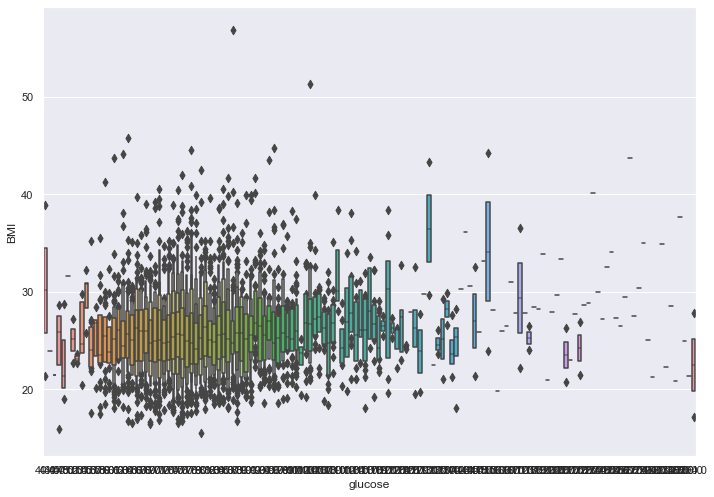

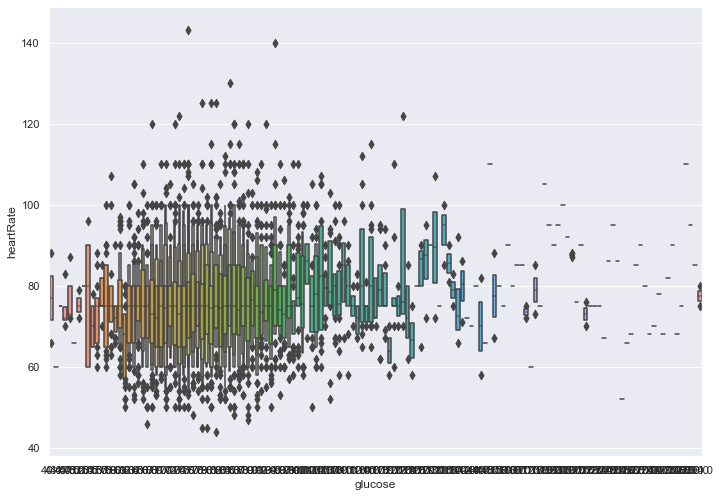

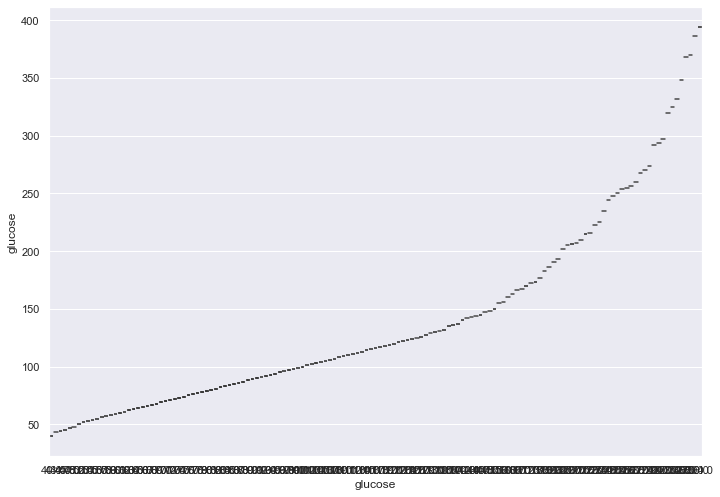

In [62]:
Boxen_plot(data,numerical)

Get the missing value count

In [16]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [17]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [66]:
def impute_data_mice(filePd,column_names):
    try:
        mice_imputer = IterativeImputer()
        arr = mice_imputer.fit_transform(filePd) 
        filePd = pd.DataFrame(arr, columns =column_names)
        return filePd
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [69]:
def impute_data_knn(filePd,column_names):
    try:
        knn_imputer = KNN()
        arr = knn_imputer.fit_transform(filePd) 
        filePd = pd.DataFrame(arr, columns =column_names)
        return filePd
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [70]:
column_names = data.columns.tolist()

In [68]:
pd_file=impute_data_mice(data,column_names)

In [21]:
data.dropna(axis=0,inplace=True)